# <h1 align="center"><b>Market Basket Analysis for Online Retail</b></h1>

# **A. Introduction**



## Project Overview

This project focuses on a Market Basket Analysis using the "Online Retail II" dataset. This dataset contains transaction data from a UK-based online retailer specializing in unique, all-occasion giftware. The primary goal of this analysis is to uncover relationships between different products sold by the retailer. By identifying which items are frequently purchased together, we can provide actionable insights for business strategies such as product placement, cross-selling campaigns, and personalized recommendations.





## Business Question

1. What items are most frequently bought together by our customers?
2. How do buying patterns change across different seasons?
3. Which products should be bundled or cross-promoted to maximize sales revenue?
4. How can we increase the number of items a customer buys in a single transaction?

# **B. Data & Libraries**

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings('ignore')

## Dataset

The dataset used is the "Online Retail II" from the UCI Machine Learning Repository. It contains transaction data from a UK-based online retailer between 01/12/2009 and 09/12/2011.

In [ ]:
file_id = '1H_yh0jbjYkUcWJOyExH6wCb2ZPnrtxNy'
file_name = 'online_retail_II.xlsx'

!gdown --id {file_id} -O {file_name}

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1H_yh0jbjYkUcWJOyExH6wCb2ZPnrtxNy
From (redirected): https://drive.google.com/uc?id=1H_yh0jbjYkUcWJOyExH6wCb2ZPnrtxNy&confirm=t&uuid=f3784c13-f606-4695-85be-e449fcb9f358
To: /content/online_retail_II.xlsx
100% 45.6M/45.6M [00:00<00:00, 49.1MB/s]


In [ ]:
df = pd.read_excel(file_name)
df

Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2      2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3      2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4      2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
...                    ...    ...          ...             ...  
525456 2010-12-09 20:01:00   2.95      17530.0  United Kingdom  
525457 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525458 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525459 2010-12-09 20:01:00   3.75      17530.0  United Kingdom  
525460 2010-12-09 20:01:00   1.95      17530.0  United Kingdom  

[525461 rows x 8 columns]

**Variable Informations:**

- `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- `Description`: Product (item) name. Nominal.
- `Quantity`: The quantities of each product (item) per transaction. Numeric.
- `InvoiceDate`: Invoice date and time. Numeric. The day and time when a transaction was generated.
- `UnitPrice`: Unit price. Numeric. Product price per unit in Pound Sterling (£).
- `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- `Country`: Country name. Nominal. The name of the country where a customer resides.


# **C. Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
# make a list to save information each column
column_info = []

# loop through each column in the DataFrame
for col in df.columns:
  num_of_missing_value = df[col].isnull().sum()
  percent_of_missing_value = (num_of_missing_value / len(df)) * 100
  data_types = df[col].dtypes
  num_of_unique_value = df[col].nunique()
  unique_value = (df[col].unique())
  column_info.append({
      'Variable': col,
      'Number of Missing Values': num_of_missing_value,
      'Percent Missing Values': percent_of_missing_value,
      'Data Types': data_types,
      'Number of Unique Values': num_of_unique_value,
      'Unique Values': unique_value
  })

# Make a DataFrame using the list column_info
df_column_info = pd.DataFrame(column_info)
df_column_info

Variable  Number of Missing Values  Percent Missing Values  \
0      Invoice                         0                0.000000   
1    StockCode                         0                0.000000   
2  Description                      2928                0.557225   
3     Quantity                         0                0.000000   
4  InvoiceDate                         0                0.000000   
5        Price                         0                0.000000   
6  Customer ID                    107927               20.539488   
7      Country                         0                0.000000   

       Data Types  Number of Unique Values  \
0          object                    28816   
1          object                     4632   
2          object                     4681   
3           int64                      825   
4  datetime64[ns]                    25296   
5         float64                     1606   
6         float64                     4383   
7          object                       40   

                                       Unique Values  
0  [489434, 489435, 489436, 489437, 489438, 48943...  
1  [85048, 79323P, 79323W, 22041, 21232, 22064, 2...  
2  [15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE...  
3  [12, 48, 24, 10, 18, 3, 16, 4, 2, 6, 8, 1, 28,...  
4  [2009-12-01 07:45:00, 2009-12-01 07:46:00, 200...  
5  [6.95, 6.75, 2.1, 1.25, 1.65, 5.95, 2.55, 3.75...  
6  [13085.0, 13078.0, 15362.0, 18102.0, 12682.0, ...  
7  [United Kingdom, France, USA, Belgium, Austral...

Interpretation:
- The dataset contains 525,461 records and 8 variables.
- The variable name for `Customer ID` is not written the same way as the others, as the other variables use **PascalCase**.
- The `Description` and `Customer ID` variables contain missing values, totaling 2,928 (0.6%) and 107,927 (21%) respectively.
- The data type of `Customer ID` is incorrect, it should be Nominal (Object).
- The `StockCode` column shows data inconsistencies, such as entries like '79323P' and '79323W', whereas basically it should be a 5-digit integer uniquely assigned to each product.

**Double-check the unique values to ensure there are no data inconsistencies**

In [ ]:
for col in df.columns:
  unique_value = df[col].unique()
  num_unique_value = df[col].nunique()
  print(f'Variable: {col}')
  print(f'Number of Unique Values: {num_unique_value}')
  print(f'Unique Values: {unique_value}')
  print('-'*100)
  print('')

Variable: Invoice
Number of Unique Values: 28816
Unique Values: [489434 489435 489436 ... 538169 538170 538171]
----------------------------------------------------------------------------------------------------

Variable: StockCode
Number of Unique Values: 4632
Unique Values: [85048 '79323P' '79323W' ... 22935 22933 21120]
----------------------------------------------------------------------------------------------------

Variable: Description
Number of Unique Values: 4681
Unique Values: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... '*Boombox Ipod Classic' 'faulty'
 'Dotcom sales']
----------------------------------------------------------------------------------------------------

Variable: Quantity
Number of Unique Values: 825
Unique Values: [   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27   -96    64   160 

Interpretation:
- The `StockCode` column shows data inconsistencies, such as entries like "79323P" and "79323W".
- Some values in the `Description` column have unnecessary whitespace. This column does not always represent the product name but sometimes contains a description of the product, such as "faulty".
- The `Quantity` column has negative values that represent returned or refunded items.
- There are unspecified countries in the `Country` column.

## **1. Data Inconsistencies**

### `Invoice` Variable

Change the name of `Invoice` to `InvoiceNo` to make it easier for us to understand that this variable contains the invoice number for a single shopping trip.

In [ ]:
# Change the name of 'Invoice' to 'InvoiceNo'
df.rename(columns={'Invoice': 'InvoiceNo'}, inplace=True)

# Display the first few rows to confirm the change
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### `CustomerID` Variable

Change the name of `Customer ID` to `CustomerID` to match the other variables using PascalCase.

In [ ]:
# Change the name of 'Customer ID' to 'CustomerID'
df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)

# Display the first few rows to confirm the change
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')

### `StockCode` Variable

Let's deep dive into the data inconsistencies in this variable:

In [ ]:
short_stockcodes_df = df[df['StockCode'].astype(str).str.len() < 5]
long_stockcodes_df = df[df['StockCode'].astype(str).str.len() > 5]

print("StockCodes with less than 5 characters:")
display(short_stockcodes_df[['StockCode', 'Description']])

print("\nStockCodes with more than 5 characters:")
display(long_stockcodes_df[['StockCode', 'Description']])

StockCodes with less than 5 characters:


StockCode     Description
89          POST         POSTAGE
126         POST         POSTAGE
173         POST         POSTAGE
625         POST         POSTAGE
735            D        Discount
...          ...             ...
524776         M          Manual
524887       DOT  DOTCOM POSTAGE
525000       DOT  DOTCOM POSTAGE
525126       DOT  DOTCOM POSTAGE
525147       DOT  DOTCOM POSTAGE

[2754 rows x 2 columns]


StockCodes with more than 5 characters:


StockCode                          Description
1         79323P                   PINK CHERRY LIGHTS
2         79323W                  WHITE CHERRY LIGHTS
12        48173C                DOOR MAT BLACK FLOCK 
23        35004B          SET OF 3 BLACK FLYING DUCKS
28        84596F         SMALL MARSHMALLOWS PINK BOWL
...          ...                                  ...
525387    84029E       RED WOOLLY HOTTIE WHITE HEART.
525388    84029G  KNITTED UNION FLAG HOT WATER BOTTLE
525389    85232B      SET OF 3 BABUSHKA STACKING TINS
525435    47591D      PINK FAIRY CAKE CHILDRENS APRON
525436    47591B             SCOTTIES CHILDRENS APRON

[77358 rows x 2 columns]

In [ ]:
short_stockcodes_df['StockCode'].unique()

array(['POST', 'D', 'DOT', 'M', 'C2', 'PADS', 'GIFT', 'm', 'S', 'B', 'C3'],
      dtype=object)

In [ ]:
unique_short_stockcodes = short_stockcodes_df['StockCode'].unique()
unique_short_stockcodes_info = []

for stock_code in unique_short_stockcodes:
    description = short_stockcodes_df[short_stockcodes_df['StockCode'] == stock_code]['Description'].iloc[0]
    unique_short_stockcodes_info.append({'StockCode': stock_code, 'Description': description})

unique_short_stockcodes_df = pd.DataFrame(unique_short_stockcodes_info)
unique_short_stockcodes_df

StockCode                 Description
0       POST                     POSTAGE
1          D                    Discount
2        DOT              DOTCOM POSTAGE
3          M                      Manual
4         C2                    CARRIAGE
5       PADS  PADS TO MATCH ALL CUSHIONS
6       GIFT                         NaN
7          m                      Manual
8          S                     SAMPLES
9          B             Adjust bad debt
10        C3                         NaN

In [ ]:
short_stockcodes_df[short_stockcodes_df['StockCode']=='GIFT'][['StockCode', 'Description']]

StockCode Description
83304      GIFT         NaN

In [ ]:
short_stockcodes_df[short_stockcodes_df['StockCode']=='C3'][['StockCode', 'Description']]

StockCode Description
302041        C3         NaN

In [ ]:
long_stockcodes_df['StockCode'].unique()

array(['79323P', '79323W', '48173C', ..., '85049g', '72803b', '79151B'],
      dtype=object)

**Interpretation:**

The `StockCode` variable contains inconsistent data. While the majority of its values are basically 5-digit integers, the description is:
- `StockCode` that contain 5-digit integers with an extra letter refer to a product's variety, such as its color or model. We do not need to handle these case, because the information is necessary for a subsequent analysis.
- `StockCode` that contain less than 5-digit integer like "POST", "D", "DOT", etc. refer to non-product items. These codes represent services, fees, adjustments, or administrative entries, not tangible goods a customer would place in a shopping basket. So, we should remove these rows.

Note:
Description of non-product items of `StockCode`:
| Index | StockCode | Description | Reason for Removal |
| :---: | :---: | :--- | :--- |
| 0 | **POST** | POSTAGE | Shipping/Service fee. |
| 1 | **D** | Discount | Monetary adjustment, not an item. |
| 2 | **DOT** | DOTCOM POSTAGE | Shipping/Service fee. |
| 3 | **M** | Manual | Generic entry for manual transactions. |
| 4 | **C2** | CARRIAGE | Shipping/Service fee. |
| 5 | **PADS** | PADS TO MATCH ALL CUSHIONS | This *could* be a product, but often flags a special type of related item or an adjustment to a cushion order. **Let's check the quantity/price**. If it's a zero-value/low-quantity item, it's safe to remove. |
| 6 | **GIFT** | NaN | Likely represents a **free gift wrapper or service**. It will be removed, because it doesn't represent a marketable product association. |
| 7 | **m** | Manual | Same as 'M', likely a data entry error. |
| 8 | **S** | SAMPLES | **Not a product** customers purchase. |
| 9 | **B** | Adjust bad debt | Financial adjustment, not an item. |
| 10 | **C3** | NaN | Unknown code/NaN description. **Remove** to maintain data integrity. |





In [ ]:
short_stockcodes_df[short_stockcodes_df['StockCode']=='PADS'][['StockCode', 'Description', 'Quantity', 'Price']]

StockCode                 Description  Quantity   Price
62299       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
74731       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
77702       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
79794       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
90798       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
97716       PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
101718      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
104480      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
123947      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
156809      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
178629      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
249035      PADS  PADS TO MATCH ALL CUSHIONS        -1  36.600
341826      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
440930      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001
468280      PADS  PADS TO MATCH ALL CUSHIONS         1   0.001

**Interpretation**

Rows containing the `StockCode` **PADS** will also be removed because they represent non-marketable, nominal-priced entries ($\text{£}0.001$) or administrative credit returns (negative quantities). Including these records would lead to irrelevant and misleading association rules in the Market Basket Analysis.

**So, let's remove the rows that contain non-product items**

In [ ]:
print(f'Total rows that contain non-product items: {short_stockcodes_df.shape[0]}')
print(f'Percentage of rows that contain non-product items: {short_stockcodes_df.shape[0] / df.shape[0] * 100:.2f}%')

Total rows that contain non-product items: 2754
Percentage of rows that contain non-product items: 0.52%


In [ ]:
# Remove rows where StockCode contains non-product items
non_product_stockcodes = ['POST', 'D', 'DOT', 'M', 'C2', 'PADS', 'GIFT', 'm', 'S', 'B', 'C3']
df = df[~df['StockCode'].isin(non_product_stockcodes)]

# Verify that the rows have been removed
print("Number of rows after deleting non-product items:", df.shape[0])

Number of rows after deleting non-product items: 522707


In [ ]:
df[df['StockCode'].astype(str).str.len() < 5]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, Price, CustomerID, Country]
Index: []

The 2,754 (0.52%) rows containing non-product items were successfully deleted.

## **2. Missing Values**





The `Description` and `CustomerID` variables contain missing values, totaling 2,928 (0.6%) and 107,927 (21%) respectively.


### `Description` Variable
First, let's handle the missing values in the `Description` variable.





In [ ]:
missing_description_df = df[df['Description'].isnull()]
display(missing_description_df[['StockCode', 'Description']])

StockCode Description
470        21646         NaN
3114       20683         NaN
3161       21350         NaN
3731       84292         NaN
4296       18010         NaN
...          ...         ...
524730     22218         NaN
524731    84534B         NaN
525231     21324         NaN
525232     20892         NaN
525233     20956         NaN

[2920 rows x 2 columns]

There are 2,928 recorded missing values in the `Description` variable. Let's deep dive into these missing values.

In [ ]:
stockcode_21646_df = df[df['StockCode'] == 21646]
stockcode_21646_df

InvoiceNo StockCode Description  Quantity         InvoiceDate  Price  \
470    489521     21646         NaN       -50 2009-12-01 11:44:00    0.0   

     CustomerID         Country  
470         NaN  United Kingdom

In [ ]:
stockcode_20683_df = df[df['StockCode'] == 20683]
stockcode_20683_df

InvoiceNo StockCode                Description  Quantity  \
3114     489655     20683                        NaN       -44   
24774    491435     20683  RAIN GIRL CHILDS UMBRELLA         1   
43854    493252     20683                        NaN         1   

              InvoiceDate  Price  CustomerID         Country  
3114  2009-12-01 17:26:00   0.00         NaN  United Kingdom  
24774 2009-12-11 10:10:00   3.25     14606.0  United Kingdom  
43854 2009-12-22 13:51:00   0.00         NaN  United Kingdom

Apparently, we can fill some missing values by referencing other values, provided they have the same `StockCode`. However, other missing values cannot be filled because there is no reference in other rows.

In [ ]:
missing_description_df['StockCode'].nunique()

1915

The number of unique missing values in the `Description` variable based on the `StockCode` variable is 1,920. It would take hours or even days to fill them one by one, so let's handle it with a for loop.

In [ ]:
# Fill in missing 'Description' values based on 'StockCode'
for index, row in df[df['Description'].isnull()].iterrows():
    stock_code = row['StockCode']
    # Find rows with the same StockCode and a non-null Description
    matching_description = df[(df['StockCode'] == stock_code) & (df['Description'].notnull())]['Description'].first_valid_index()
    if matching_description is not None:
        df.loc[index, 'Description'] = df.loc[matching_description, 'Description']

In [ ]:
df[df['StockCode'] == 20683]

InvoiceNo StockCode                Description  Quantity  \
3114     489655     20683  RAIN GIRL CHILDS UMBRELLA       -44   
24774    491435     20683  RAIN GIRL CHILDS UMBRELLA         1   
43854    493252     20683  RAIN GIRL CHILDS UMBRELLA         1   

              InvoiceDate  Price  CustomerID         Country  
3114  2009-12-01 17:26:00   0.00         NaN  United Kingdom  
24774 2009-12-11 10:10:00   3.25     14606.0  United Kingdom  
43854 2009-12-22 13:51:00   0.00         NaN  United Kingdom

In [ ]:
# Check if there are still missing values in 'Description'
print("Missing values in Description after filling:")
print(df['Description'].isnull().sum())

Missing values in Description after filling:
363


In [ ]:
print(df['Description'].isna().sum() / len(df) * 100)

0.06944617156456677


Some missing value rows have been filled by referencing other values in the `Description` variable that have the same `StockCode`. And now, there are 365 (0.069%) remaining missing values in the Description variable.

Let's drop the remaining missing values, considering the importance of knowing the name of the product the customer purchased.

In [ ]:
# Drop rows with remaining missing values in 'Description'
df.dropna(subset=['Description'], inplace=True)

# Check if there are still missing values in 'Description'
print("Missing values in Description after dropping:")
print(df['Description'].isnull().sum())

Missing values in Description after dropping:
0


### `CustomerID` Variable

In [ ]:
df[df['CustomerID'].isnull()]

InvoiceNo StockCode                          Description  Quantity  \
263       489464     21733                         85123a mixed       -96   
283       489463     71477                                short      -240   
284       489467    85123A                          21733 mixed      -192   
577       489525    85226C            BLUE PULL BACK RACING CAR         1   
578       489525     85227          SET/6 3D KIT CARDS FOR KIDS         1   
...          ...       ...                                  ...       ...   
525231    538159     21324         HANGING MEDINA LANTERN SMALL       -18   
525232    538158     20892  SET/3 TALL GLASS CANDLE HOLDER PINK       -32   
525233    538160     20956   PORCELAIN T-LIGHT HOLDERS ASSORTED       288   
525234    538161    46000S                         Dotcom sales      -100   
525235    538162    46000M                         Dotcom sales      -100   

               InvoiceDate  Price  CustomerID         Country  
263    2009-12-01 10:52:00   0.00         NaN  United Kingdom  
283    2009-12-01 10:52:00   0.00         NaN  United Kingdom  
284    2009-12-01 10:53:00   0.00         NaN  United Kingdom  
577    2009-12-01 11:49:00   0.55         NaN  United Kingdom  
578    2009-12-01 11:49:00   0.85         NaN  United Kingdom  
...                    ...    ...         ...             ...  
525231 2010-12-09 17:17:00   0.00         NaN  United Kingdom  
525232 2010-12-09 17:17:00   0.00         NaN  United Kingdom  
525233 2010-12-09 17:18:00   0.00         NaN  United Kingdom  
525234 2010-12-09 17:25:00   0.00         NaN  United Kingdom  
525235 2010-12-09 17:25:00   0.00         NaN  United Kingdom  

[106519 rows x 8 columns]

In [ ]:
print(df['CustomerID'].isnull().sum())

106519


In [ ]:
print(df['CustomerID'].isnull().sum() / len(df) * 100)

20.392499961711056


The `CustomerID` variable has 107,562 (20.48%) missing values. We would lose a lot of data if we were to delete the rows that contain them. Furthermore, the missing values for `CustomerID` represent unregistered customers, so their transactions are still legitimate for this analysis.

Therefore, for this market basket analysis, we will use the `InvoiceNo` variable instead, considering the items a customer bought in a single shopping trip.

## **3. Additional Deletion**

### `InvoiceNo` Variable

On the `InvoiceNo` variable, if a value starts with the letter 'C', it indicates a cancellation. So, we need to delete these rows.

In [ ]:
# Display rows where InvoiceNo starts with 'C'
df[df['InvoiceNo'].astype(str).str.startswith('C')]

InvoiceNo StockCode                        Description  Quantity  \
178      C489449     22087           PAPER BUNTING WHITE LACE       -12   
179      C489449    85206A       CREAM FELT EASTER EGG BASKET        -6   
180      C489449     21895      POTTING SHED SOW 'N' GROW SET        -4   
181      C489449     21896                 POTTING SHED TWINE        -6   
182      C489449     22083         PAPER CHAIN KIT RETRO SPOT       -12   
...          ...       ...                                ...       ...   
524694   C538123     22333  RETROSPOT PARTY BAG + STICKER SET        -1   
524695   C538123     22956           36 FOIL HEART CAKE CASES        -2   
524697   C538124     22699   ROSES REGENCY TEACUP AND SAUCER         -1   
524698   C538124     22423           REGENCY CAKESTAND 3 TIER        -1   
525282   C538164    35004B        SET OF 3 BLACK FLYING DUCKS        -1   

               InvoiceDate  Price  CustomerID         Country  
178    2009-12-01 10:33:00   2.95     16321.0       Australia  
179    2009-12-01 10:33:00   1.65     16321.0       Australia  
180    2009-12-01 10:33:00   4.25     16321.0       Australia  
181    2009-12-01 10:33:00   2.10     16321.0       Australia  
182    2009-12-01 10:33:00   2.95     16321.0       Australia  
...                    ...    ...         ...             ...  
524694 2010-12-09 15:41:00   1.65     12605.0         Germany  
524695 2010-12-09 15:41:00   2.10     12605.0         Germany  
524697 2010-12-09 15:43:00   2.95     15329.0  United Kingdom  
524698 2010-12-09 15:43:00  12.75     15329.0  United Kingdom  
525282 2010-12-09 17:32:00   1.95     14031.0  United Kingdom  

[9666 rows x 8 columns]

In [ ]:
# Calculate and print the percentage of cancellation rows
cancellation_count = df[df['InvoiceNo'].astype(str).str.startswith('C')].shape[0]
percentage_cancellations = (cancellation_count / len(df)) * 100
print(f"Percentage of cancellation rows: {percentage_cancellations:.2f}%")

Percentage of cancellation rows: 1.85%


The `InvoiceNo` variable has 10,206 (1.94%) purchase cancellations. Let's delete these rows, considering the customer did not go through with the purchase.

In [ ]:
# Delete rows with cancellation purchases
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Verify that the rows have been removed
print("Number of rows after deleting cancellations:", df.shape[0])

Number of rows after deleting cancellations: 512678


### `Quantity` Variable

The `Quantity` column has negative values that represent returned or refunded items. Since a negative quantity represents a purchase reversal, not a purchase itself, these rows should not be included in the analysis.

In [ ]:
negative_quantity_df = df[df['Quantity'] < 0]
negative_quantity_df['Quantity']

263        -96
283       -240
284       -192
3114       -44
3162     -1043
          ... 
524458    -177
525231     -18
525232     -32
525234    -100
525235    -100
Name: Quantity, Length: 1819, dtype: int64

In [ ]:
percentage_negative_quantity = (df[df['Quantity'] < 0].shape[0] / len(df)) * 100
print(f"Percentage of rows with negative quantity: {percentage_negative_quantity:.2f}%")

Percentage of rows with negative quantity: 0.35%


There are 1,819 rows (0.35% of the data) containing negative values in the `Quantity` variable. These rows will be deleted.

In [ ]:
# Delete rows with negative quantity
df = df[df['Quantity'] >= 0]

# Verify that the rows have been removed
print("Number of rows after deleting negative quantities:", df.shape[0])

Number of rows after deleting negative quantities: 510859


In [ ]:
df[df['Quantity']<0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, Price, CustomerID, Country]
Index: []

### Incomplete December 2010 Data Removal

The dataset's recording period concluded on December 9, 2010. Consequently, December 2010 will be excluded from all primary Market Basket Analysis (MBA) runs. Retaining this incomplete month would artificially skew (or deflate) the resulting support and confidence metrics.

So, let's delete it.

In [ ]:
december_2010_df = df[(df["InvoiceDate"].dt.month == 12) & (df["InvoiceDate"].dt.year == 2010)]
print(f'Number of rows in December 2010: {december_2010_df.shape[0]}')
print(f'Percentage of number of rows in December 2010: {december_2010_df.shape[0] / len(df) * 100:.2f}%')

Number of rows in December 2010: 22049
Percentage of number of rows in December 2010: 4.32%


In [ ]:
df = df[~((df["InvoiceDate"].dt.month == 12) & (df["InvoiceDate"].dt.year == 2010))]

# Verify the data for December 2010 is removed
print("Number of rows after removing December 2010:", df.shape[0])

Number of rows after removing December 2010: 488810


The 22,049 rows (4.32%) from December 2010 have been successfully deleted from this dataset.

## **4. Whitespace**

Based on the observations above, some values in the `Description` variable contain unnecessary whitespace. Let's delete this whitespace.

In [ ]:
# Delete whitespace in the Description variable
df['Description'] = df['Description'].str.strip()

# Display the first few rows to confirm the change
display(df.head())

InvoiceNo StockCode                          Description  Quantity  \
0    489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1    489434    79323P                   PINK CHERRY LIGHTS        12   
2    489434    79323W                  WHITE CHERRY LIGHTS        12   
3    489434     22041          RECORD FRAME 7" SINGLE SIZE        48   
4    489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  CustomerID         Country  
0 2009-12-01 07:45:00   6.95     13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.0  United Kingdom

## **5. Data Type**

We need to convert the `CustomerID` variable's data type from float to object to properly represent the unique ID for each customer.



In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID             object
Country                object
dtype: object

# **D. EDA**

## Total Sales by Month (2009-2011)

In [ ]:
# Extract the month and year from the InvoiceDate
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceMonth'].head(1)

0    2009-12
Name: InvoiceMonth, dtype: period[M]

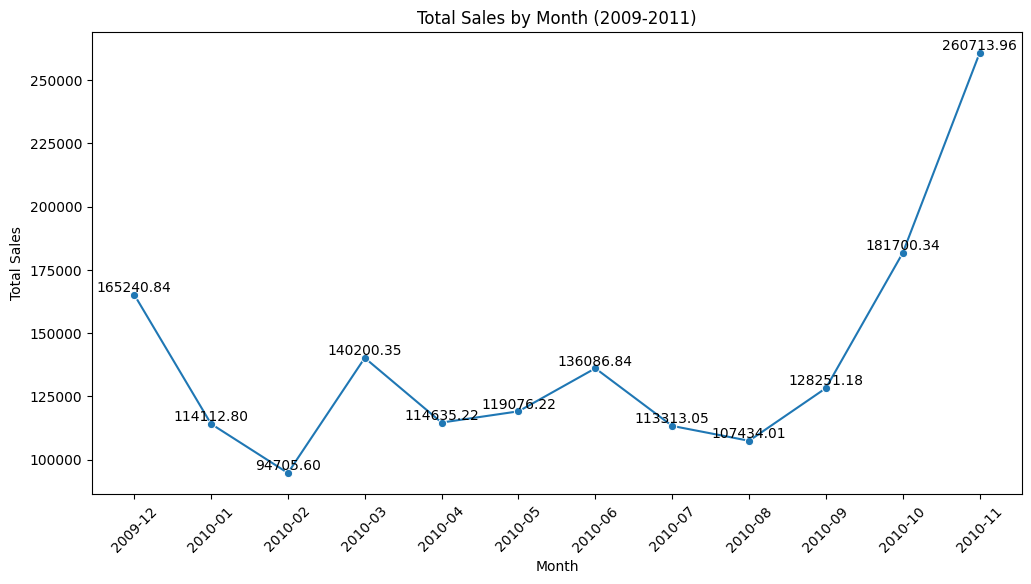

In [ ]:
# Calculate total sales by month
monthly_sales = df.groupby('InvoiceMonth')['Price'].sum().reset_index()

# Convert 'InvoiceMonth' to string for plotting
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

# Visualize it in a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='Price', data=monthly_sales, marker='o')
plt.title('Total Sales by Month (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add annotations for total sales values on the markers
for i, row in monthly_sales.iterrows():
    plt.text(row['InvoiceMonth'], row['Price'], f'{row["Price"]:.2f}', ha='center', va='bottom')

plt.savefig('total_sales_by_month.png')
plt.show()

**Interpretation**
1. The sales exhibit a strong, predictable seasonal cycle, starting high, dipping in the summer, and surging to a massive peak in late autumn.
2. The highest sales figure is recorded in November 2010 (£260,713.96). This unequivocally identifies the holiday season preparation (Thanksgiving, Black Friday, early Christmas shopping) as the single most critical sales period.
3. The analysis of sales peaks at the beginning of each meteorological season is confirmed:
    - December 2009 (£165,240.84): Winter kickoff.
    - March 2010 (£140,200.35): Spring kickoff.
    - June 2010 (£136,086.84): Summer kickoff.
    - September 2010 (£128,251.18): Autumn buildup.
4. The lowest sales figure is recorded in February 2010 (£94,705.60). This month, following the post-holiday January drop, represents the slowest sales period of the year.
5. There is a significant expected drop from the high December 2009 sales (£165,240.84) into January and February 2010, reflecting the typical post-holiday spending lull.

Reference:

- *Meteorological seasons of UK: https://weather.metoffice.gov.uk/learn-about/met-office-for-schools/other-content/other-resources/our-seasons*

## Total Quantity of Item Sold by Month (2009-2011)

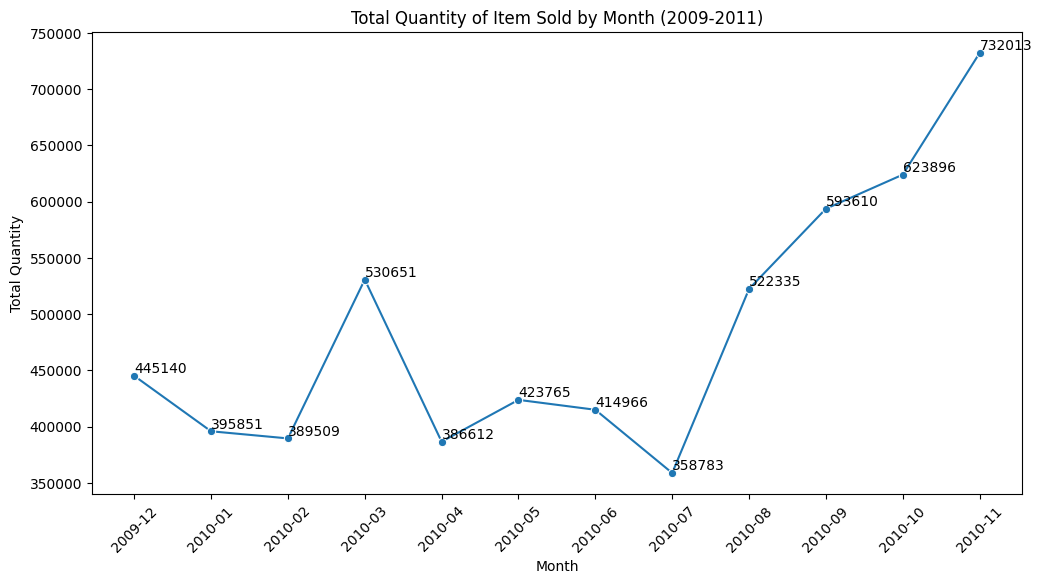

In [ ]:
# Calculate total quantity of item sold by month
monthly_quantity = df.groupby('InvoiceMonth')['Quantity'].sum().reset_index()

# Convert 'InvoiceMonth' to string for plotting
monthly_quantity['InvoiceMonth'] = monthly_quantity['InvoiceMonth'].astype(str)

# Visualize the total quantity of item sold by month using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='Quantity', data=monthly_quantity, marker='o')
plt.title('Total Quantity of Item Sold by Month (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Add annotations for total quantity values on the markers
for i, row in monthly_quantity.iterrows():
    plt.text(row['InvoiceMonth'], row['Quantity'], row["Quantity"], ha='left', va='bottom')

plt.savefig('total_quantity_by_month.png')
plt.show()

**Interpretation**

1. The highest quantity sold is in November 2010 (732,013 units). This confirms that the holiday season surge is driven primarily by sheer volume of items purchased, aligning perfectly with the total sales peak.
2. The lowest quantity sold is in July 2010 (358,783 units). This month is the definitive summer slump for item volume, highlighting a period of low customer purchasing activity.
3. A significant secondary peak occurs in March 2010 (530,651 units). This indicates the start of spring drives a high volume of product purchases, suggesting customers are stocking up on many items for the new season.
4. The quantity sold in June 2010 (414,966 units) is lower than the quantity sold in May (423,765 units). However, the earlier EDA on the sales plot showed June sales revenue increased from May. This confirms that the June revenue increase was not due to more items being sold, but due to a change in the product mix towards fewer, higher-priced items (high-value goods, as previously identified).

## Total Unique Item Sold by Month (2009-2011)

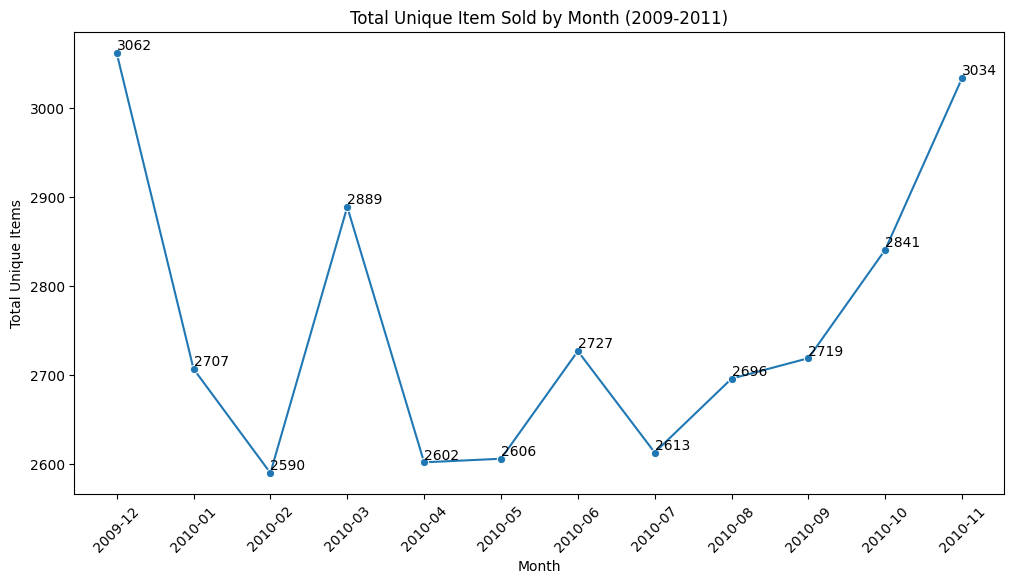

In [ ]:
# Calculate total unique item sold by month
monthly_unique_items = df.groupby('InvoiceMonth')['StockCode'].nunique().reset_index()

# Convert 'InvoiceMonth' to string for plotting
monthly_unique_items['InvoiceMonth'] = monthly_unique_items['InvoiceMonth'].astype(str)

# Visualize the total unique item sold by month using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceMonth', y='StockCode', data=monthly_unique_items, marker='o')
plt.title('Total Unique Item Sold by Month (2009-2011)')
plt.xlabel('Month')
plt.ylabel('Total Unique Items')
plt.xticks(rotation=45)

# Add annotations for total unique items values on the markers
for i, row in monthly_unique_items.iterrows():
    plt.text(row['InvoiceMonth'], row['StockCode'], row["StockCode"], ha='left', va='bottom')

plt.savefig('total_unique_items_by_month.png')
plt.show()

**Interpretation**
1. The highest variety is at the beginning of the winter/holiday season (December 2009), totaling 3,062 unique items. Then, the secondary peak is on November 2010, totaling 3,034 unique items.This confirms the holiday shopping season (Nov/Dec) requires the broadest product assortment. Customers are shopping for unique items, likely gifts.
2. The secondary sales/quantity peak in March 2010 is also a significant peak for unique items (2,889). This suggests the beginning of spring requires both high volume and a diverse selection of new seasonal goods.
3. The lowest variety of items sold occurs in the winter and summer lulls:
    - February 2010: 2,590 unique items (lowest of the year).
    - April/May 2010: Around 2,600 unique items.
    - July 2010: 2,613 unique items.
4. The June 2010 peak in unique items (2,727) is notable. Coupled with the fact that June sales were high but quantity was low, it means customers were buying fewer units per transaction but selecting from a moderately diverse, high-value assortment.


# **E. Strategic Market Basket Analysis (MBA) Segmentation**




Considering the results of the Exploratory Data Analysis (EDA), the Market Basket Analysis (MBA) will be run separately on four strategic time segments to extract actionable and non-overlapping insights into customer purchasing behavior.

1. Ultimate Peak MBA (Volume & Variety Driver)
    - Focus: November 2010.
    - EDA Rationale: This month registered the highest Sales, Highest Quantity, and High Variety.
    - Strategic Goal: Identify high-volume gifting and holiday bundles to maximize units sold during the critical holiday build-up.

2. High-Value Discrepancy MBA (Revenue Driver)
    - Focus: June 2010.
    - EDA Rationale: This period showed High Sales, but Low Quantity with Moderate Variety (compared to May).
    - Strategic Goal: Identify high-margin, high-value bundles to inform upselling strategies and premium product placement.

3. Seasonal Transition MBA (New Product Bundling)
    - Focus: March 2010 (Spring Kickoff).
    - EDA Rationale: This month demonstrated significant peaks in Sales, Quantity, and Variety, marking the start of a new buying pattern.
    - Strategic Goal: Discover rules involving new seasonal products for timely cross-selling at the start of the season.

4. Trough Season MBA (Core Business Staples)
    - Focus: February 2010 (Lowest Sales) and July 2010 (Lowest Quantity).
    - EDA Rationale: These months represent the lowest overall performance, indicating a reliance on core, evergreen products.
    - Strategic Goal: Identify highly frequent, basic item associations to guide minimum inventory levels and stable product placement during slow periods.

## **1. The Ultimate Peak MBA (Volume and Variety Driver)**

This market basket analysis will focus on November 2010, as exploratory data analysis revealed it had the highest sales, highest quantity, and high product variety. The goal of this process is to identify high-volume gifting and holiday bundles to maximize units sold during the critical holiday build-up.

### Data Preprocessing

Filtering data to November 2010:

In [ ]:
df_nov = df[df['InvoiceMonth'] == '2010-11']
df_nov.head()

InvoiceNo StockCode                         Description  Quantity  \
424923    529995     48184                DOORMAT ENGLISH ROSE         6   
424924    529995     48187                 DOORMAT NEW ENGLAND         4   
424925    529995     21523  DOORMAT FANCY FONT HOME SWEET HOME        10   
424926    529995     22708                     WRAP DOLLY GIRL        25   
424927    529995     22781               GUMBALL MAGAZINE RACK         4   

               InvoiceDate  Price CustomerID         Country InvoiceMonth  
424923 2010-11-01 08:56:00   7.95    16316.0  United Kingdom      2010-11  
424924 2010-11-01 08:56:00   7.95    16316.0  United Kingdom      2010-11  
424925 2010-11-01 08:56:00   6.75    16316.0  United Kingdom      2010-11  
424926 2010-11-01 08:56:00   0.42    16316.0  United Kingdom      2010-11  
424927 2010-11-01 08:56:00   7.65    16316.0  United Kingdom      2010-11

For the market basket analysis, I will group the products (`Description`) by the `InvoiceNo` to identify the items purchased in each single transaction. This step is crucial as it defines the **baskets** for the analysis

In [ ]:
basket_nov = df_nov.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket_nov.head()

InvoiceNo                                        Description
0     529995  [DOORMAT ENGLISH ROSE, DOORMAT NEW ENGLAND, DO...
1     529996  [CHRISTMAS CARD STACK OF PRESENTS, CHRISTMAS C...
2     529997  [SET OF 6 STRAWBERRY CHOPSTICKS, WRAP CHRISTMA...
3     530000  [RED RETROSPOT STORAGE JAR, METAL 4 HOOK HANGE...
4     530001  [PORCELAIN BUTTERFLY OIL BURNER, OPULENT VELVE...

To prepare the data for the **TransactionEncoder**, the aggregated list of item descriptions for each invoice must be extracted from the grouped DataFrame column. This creates the final list of lists format, where each inner list represents a single customer transaction.

In [ ]:
transaction_nov = basket_nov['Description'].to_list()
transaction_nov

[['DOORMAT ENGLISH ROSE',
  'DOORMAT NEW ENGLAND',
  'DOORMAT FANCY FONT HOME SWEET HOME',
  'WRAP DOLLY GIRL',
  'GUMBALL MAGAZINE RACK',
  "CHILDREN'S APRON DOLLY GIRL",
  'GUMBALL COAT RACK',
  'VINTAGE CARAVAN GIFT WRAP',
  'GUMBALL MONOCHROME COAT RACK',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'COLOUR GLASS. STAR T-LIGHT HOLDER',
  'WRAP CHRISTMAS VILLAGE',
  'HOT WATER BOTTLE BABUSHKA',
  'CHILDRENS APRON SPACEBOY DESIGN'],
 ['CHRISTMAS CARD STACK OF PRESENTS',
  'CHRISTMAS CARD SCREEN PRINT',
  'FELT FARM ANIMAL WHITE BUNNY',
  'LUNCH BOX I LOVE LONDON',
  'SET OF THREE VINTAGE GIFT WRAPS',
  'LARGE HEART MEASURING SPOONS',
  'BLACK ENCHANTED FOREST PLACEMAT',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  '3 TIER CAKE TIN GREEN AND CREAM',
  'RECIPE BOX PANTRY YELLOW DESIGN',
  'JUMBO BAG DOLLY GIRL DESIGN',
  'JUMBO BAG WOODLAND ANIMALS',
  'CARD MOTORBIKE SANTA',
  'PACK 3 BOXES BIRD PANNETONE',
  'CHRISTMAS CARD STACK OF PRESENTS',
  'CHRISTMAS CARD SCREEN PRINT',
  'PACK OF 6 

To prepare the data for the Apriori algorithm, which requires a boolean format, I converted the raw transaction data into a binary format. This step, known as **Transaction Encoding**, represents each item as either present or absent in a given basket.

In [ ]:
# initialize the TransactionEncoder
te = TransactionEncoder()

# Convert all elements in the transaction_nov list to strings
transaction_nov = [[str(item) for item in sublist] for sublist in transaction_nov]

# fit the encoder to the list of transaction_nov and transform the data
te_array = te.fit(transaction_nov).transform(transaction_nov)

# convert the binary array into a pandas DataFrame
df_nov_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_nov_encoded.head()

10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
0                   False                       False   
1                   False                       False   
2                   False                       False   
3                   False                       False   
4                   False                       False   

   12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  \
0                             False                            False   
1                             False                            False   
2                             False                            False   
3                             False                            False   
4                             False                            False   

   12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  \
0                          False                                False   
1                          False                                False   
2                          False                                False   
3                          False                                False   
4                          False                                False   

   12 PENCILS SMALL TUBE RED SPOTTY  12 PENCILS SMALL TUBE SKULL  ...  \
0                             False                        False  ...   
1                             False                        False  ...   
2                             False                        False  ...   
3                             False                        False  ...   
4                             False                        False  ...   

   ZINC HEART LATTICE PLANTER BOWL  ZINC HEART LATTICE T-LIGHT HOLDER  \
0                            False                              False   
1                            False                              False   
2                            False                              False   
3                            False                              False   
4                            False                              False   

   ZINC HEART LATTICE TRAY OVAL  ZINC METAL HEART DECORATION  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   ZINC TOP  2 DOOR WOODEN SHELF  ZINC WILLIE WINKIE  CANDLE STICK  \
0                          False                             False   
1                          False                             False   
2                          False                             False   
3                          False                             False   
4                          False                             False   

   amazon adjustment  amendment  mailout  mailout addition  
0              False      False    False             False  
1              False      False    False             False  
2              False      False    False             False  
3              False      False    False             False  
4              False      False    False             False  

[5 rows x 3067 columns]

### Apriori Algorithm

The Apriori algorithm is applied to the one-hot encoded November data to identify Frequent Itemsets. The `min_support` is set to 0.05 (5%), meaning item combinations must appear in at least 5% of all November transactions to be considered frequent. This relatively high threshold is used to focus the analysis on only the most common, high-volume product bundles during the peak shopping season. The `use_colnames=True` argument ensures the output uses product names for clear interpretation.

In [ ]:
frequent_itemsets_nov = apriori(df_nov_encoded, min_support=0.05, use_colnames=True)
frequent_itemsets_nov

support                                           itemsets
0   0.051761               (3 HEARTS HANGING DECORATION RUSTIC)
1   0.054225                           (6 RIBBONS RUSTIC CHARM)
2   0.075000                  (60 CAKE CASES VINTAGE CHRISTMAS)
3   0.055634                         (ALARM CLOCK BAKELIKE RED)
4   0.066197                  (ANTIQUE SILVER TEA GLASS ETCHED)
5   0.082746                    (ASSORTED COLOUR BIRD ORNAMENT)
6   0.083451                       (CHOCOLATE HOT WATER BOTTLE)
7   0.058099                       (FAWN BLUE HOT WATER BOTTLE)
8   0.064437                       (FELTCRAFT 6 FLOWER FRIENDS)
9   0.053873                      (GREY HEART HOT WATER BOTTLE)
10  0.100352                          (HAND WARMER BIRD DESIGN)
11  0.112676                           (HAND WARMER OWL DESIGN)
12  0.083803                        (HAND WARMER RED RETROSPOT)
13  0.109155                    (HAND WARMER SCOTTY DOG DESIGN)
14  0.087324                           (HAND WARMER UNION JACK)
15  0.071479                            (HEART OF WICKER LARGE)
16  0.053873                         (HOME BUILDING BLOCK WORD)
17  0.062676                        (HOT WATER BOTTLE BABUSHKA)
18  0.059507                  (HOT WATER BOTTLE I AM SO POORLY)
19  0.073592                (HOT WATER BOTTLE TEA AND SYMPATHY)
20  0.088028                          (JUMBO BAG RED RETROSPOT)
21  0.052817                           (JUMBO STORAGE BAG SUKI)
22  0.060211              (KNITTED UNION FLAG HOT WATER BOTTLE)
23  0.050704                          (LUNCH BAG RED RETROSPOT)
24  0.061972                   (NATURAL SLATE HEART CHALKBOARD)
25  0.070070                  (PACK OF 72 RETROSPOT CAKE CASES)
26  0.115845                   (PAPER CHAIN KIT 50'S CHRISTMAS)
27  0.100352                (PAPER CHAIN KIT VINTAGE CHRISTMAS)
28  0.066197                     (PLEASE ONE PERSON METAL SIGN)
29  0.052465                  (RECIPE BOX PANTRY YELLOW DESIGN)
30  0.065493                 (RED HANGING HEART T-LIGHT HOLDER)
31  0.061972                   (RED WOOLLY HOTTIE WHITE HEART.)
32  0.099648                         (REGENCY CAKESTAND 3 TIER)
33  0.064437                 (RETROSPOT HEART HOT WATER BOTTLE)
34  0.067958                  (RETROSPOT TEA SET CERAMIC 11 PC)
35  0.071831                     (REX CASH+CARRY JUMBO SHOPPER)
36  0.081338                     (SCOTTIE DOG HOT WATER BOTTLE)
37  0.067958              (SET OF 20 VINTAGE CHRISTMAS NAPKINS)
38  0.052817                     (SET OF 3 NOTEBOOKS IN PARCEL)
39  0.074296                             (SMALL POPCORN HOLDER)
40  0.055634                   (STRAWBERRY CERAMIC TRINKET BOX)
41  0.056690                               (VINTAGE SNAP CARDS)
42  0.139437               (WHITE HANGING HEART T-LIGHT HOLDER)
43  0.067606                     (WHITE SKULL HOT WATER BOTTLE)
44  0.063028                                      (WICKER STAR)
45  0.065493  (HAND WARMER BIRD DESIGN, HAND WARMER OWL DESIGN)
46  0.060563  (HAND WARMER BIRD DESIGN, HAND WARMER SCOTTY D...
47  0.067606  (HAND WARMER SCOTTY DOG DESIGN, HAND WARMER OW...
48  0.052465   (HAND WARMER OWL DESIGN, HAND WARMER UNION JACK)
49  0.058451  (PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI...

### Generate Association Rules

Generating Association Rules (Ultimate Peak MBA)
With the Frequent Itemsets identified, the next step is to generate actionable Association Rules using the `association_rules` function. The process sets the primary metric to `confidence` with a minimum threshold of 0.5 (50%). This means the resulting rules must predict the purchase of the consequent item at least 50% of the time, given the purchase of the antecedent item(s). This threshold focuses the analysis on rules with high predictive reliability for cross-selling during the peak season.

In [ ]:
rules_nov = association_rules(frequent_itemsets_nov, metric='confidence', min_threshold=0.5)
rules_nov

antecedents                          consequents  \
0            (HAND WARMER BIRD DESIGN)             (HAND WARMER OWL DESIGN)   
1             (HAND WARMER OWL DESIGN)            (HAND WARMER BIRD DESIGN)   
2            (HAND WARMER BIRD DESIGN)      (HAND WARMER SCOTTY DOG DESIGN)   
3      (HAND WARMER SCOTTY DOG DESIGN)            (HAND WARMER BIRD DESIGN)   
4      (HAND WARMER SCOTTY DOG DESIGN)             (HAND WARMER OWL DESIGN)   
5             (HAND WARMER OWL DESIGN)      (HAND WARMER SCOTTY DOG DESIGN)   
6             (HAND WARMER UNION JACK)             (HAND WARMER OWL DESIGN)   
7  (PAPER CHAIN KIT VINTAGE CHRISTMAS)     (PAPER CHAIN KIT 50'S CHRISTMAS)   
8     (PAPER CHAIN KIT 50'S CHRISTMAS)  (PAPER CHAIN KIT VINTAGE CHRISTMAS)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.100352            0.112676  0.065493    0.652632  5.792105   
1            0.112676            0.100352  0.065493    0.581250  5.792105   
2            0.100352            0.109155  0.060563    0.603509  5.528919   
3            0.109155            0.100352  0.060563    0.554839  5.528919   
4            0.109155            0.112676  0.067606    0.619355  5.496774   
5            0.112676            0.109155  0.067606    0.600000  5.496774   
6            0.087324            0.112676  0.052465    0.600806  5.332157   
7            0.100352            0.115845  0.058451    0.582456  5.027889   
8            0.115845            0.100352  0.058451    0.504559  5.027889   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.054186    2.554417       0.919639  0.443914   0.608521   
1               1.0  0.054186    2.148413       0.932412  0.443914   0.534540   
2               1.0  0.049609    2.246822       0.910504  0.406619   0.554927   
3               1.0  0.049609    2.020948       0.919501  0.406619   0.505183   
4               1.0  0.055306    2.331105       0.918314  0.438356   0.571019   
5               1.0  0.055306    2.227113       0.921958  0.438356   0.550988   
6               1.0  0.042625    2.222791       0.890194  0.355609   0.550115   
7               1.0  0.046825    2.117514       0.890470  0.370536   0.527748   
8               1.0  0.046825    1.815854       0.906074  0.370536   0.449295   

   kulczynski  
0    0.616941  
1    0.616941  
2    0.579174  
3    0.579174  
4    0.609677  
5    0.609677  
6    0.533216  
7    0.543508  
8    0.543508

The count of rules is displayed, and the rules are then arranged by the lift metric, followed by confidence, in descending order. Using `.reset_index(drop=True)` ensures the output has a clean, sequential index for easy review. This prioritization highlights the strongest, non-random associations essential for peak season cross-selling strategies.

In [ ]:
print("Association Rules:", rules_nov.shape[0])
rules_nov[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(by=["lift", "confidence"], ascending=False).reset_index(drop=True)

Association Rules: 9


antecedents                          consequents  \
0            (HAND WARMER BIRD DESIGN)             (HAND WARMER OWL DESIGN)   
1             (HAND WARMER OWL DESIGN)            (HAND WARMER BIRD DESIGN)   
2            (HAND WARMER BIRD DESIGN)      (HAND WARMER SCOTTY DOG DESIGN)   
3      (HAND WARMER SCOTTY DOG DESIGN)            (HAND WARMER BIRD DESIGN)   
4      (HAND WARMER SCOTTY DOG DESIGN)             (HAND WARMER OWL DESIGN)   
5             (HAND WARMER OWL DESIGN)      (HAND WARMER SCOTTY DOG DESIGN)   
6             (HAND WARMER UNION JACK)             (HAND WARMER OWL DESIGN)   
7     (PAPER CHAIN KIT 50'S CHRISTMAS)  (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
8  (PAPER CHAIN KIT VINTAGE CHRISTMAS)     (PAPER CHAIN KIT 50'S CHRISTMAS)   

    support  confidence      lift  
0  0.065493    0.652632  5.792105  
1  0.065493    0.581250  5.792105  
2  0.060563    0.603509  5.528919  
3  0.060563    0.554839  5.528919  
4  0.067606    0.619355  5.496774  
5  0.067606    0.600000  5.496774  
6  0.052465    0.600806  5.332157  
7  0.058451    0.504559  5.027889  
8  0.058451    0.582456  5.027889

**Interpretation**

1. The Hand Warmer Multi-Buy (Rules 0 to 6)

This dominant pattern shows customers are not buying just one Hand Warmer; they are buying multiple different designs (bird, owl, scotty dog, and union jack) in a single transaction. For example, similar to Rule 0, customers who buy the Hand Warmer Bird Design are 65.26% likely to also buy the Hand Warmer Owl Design.

Customers likely view the various designs as options within one overall purchase, treating Hand Warmers as a gift set by buying small, low-cost gifts for multiple people.

2. Christmas Decoration Bundles (Rules 7 & 8)

This set confirms a strong co-purchase of specific seasonal decorating items (Paper Chain Kit 50's Christmas and Paper Chain Kit Vintage Christmas), driven by project needs. Customers are stocking up on decorating supplies and want variety in their crafts/decorations. These items are seen as complements for a single Christmas project.

## **2. The High-Value Discrepancy MBA (Revenue Driver)**

This market basket analysis will focus on June 2010, as exploratory data analysis revealed it had high sales, but low quantity with moderate variety compared with the previous month (May 2010). The goal of this market basket analysis is to identify high-margin, high-value bundles to inform upselling strategis and premium product placement.

### Data Preprocessing

Filtering data to June 2010:

In [ ]:
df_jun = df[df['InvoiceMonth'] == '2010-06']
df_jun.head()

InvoiceNo StockCode                   Description  Quantity  \
217062    510446     22605     WOODEN CROQUET GARDEN SET         1   
217063    510446     22348      TEA BAG PLATE RED SPOTTY        12   
217064    510446     22607    WOODEN ROUNDERS GARDEN SET         2   
217065    510446     22606    WOODEN SKITTLES GARDEN SET         1   
217066    510446     21136  PAINTED METAL PEARS ASSORTED         8   

               InvoiceDate  Price CustomerID         Country InvoiceMonth  
217062 2010-06-01 09:02:00  12.75    13503.0  United Kingdom      2010-06  
217063 2010-06-01 09:02:00   0.85    13503.0  United Kingdom      2010-06  
217064 2010-06-01 09:02:00   8.50    13503.0  United Kingdom      2010-06  
217065 2010-06-01 09:02:00  15.95    13503.0  United Kingdom      2010-06  
217066 2010-06-01 09:02:00   1.69    13503.0  United Kingdom      2010-06

For the market basket analysis, I will group the products (`Description`) by the `InvoiceNo` to identify the items purchased in each single transaction. This step is crucial as it defines the **baskets** for the analysis

In [ ]:
basket_jun = df_jun.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket_jun.head()

InvoiceNo                                        Description
0     510446  [WOODEN CROQUET GARDEN SET, TEA BAG PLATE RED ...
1     510447  [STRAWBERRY FAIRY CAKE TEAPOT, VINTAGE UNION J...
2     510449  [VICTORIAN GLASS HANGING T-LIGHT, EMBOSSED GLA...
3     510450  [OFFICE MUG WARMER PINK, OFFICE MUG WARMER CHO...
4     510451  [SMALL RED RETROSPOT WINDMILL, CHILDS GARDEN T...

To prepare the data for the **TransactionEncoder**, the aggregated list of item descriptions for each invoice must be extracted from the grouped DataFrame column. This creates the final list of lists format, where each inner list represents a single customer transaction.

In [ ]:
transaction_jun = basket_jun['Description'].to_list()
transaction_jun

[['WOODEN CROQUET GARDEN SET',
  'TEA BAG PLATE RED SPOTTY',
  'WOODEN ROUNDERS GARDEN SET',
  'WOODEN SKITTLES GARDEN SET',
  'PAINTED METAL PEARS ASSORTED',
  'ENCHANTED BIRD COATHANGER 5 HOOK',
  'FIVE HEART HANGING DECORATION',
  'FLORAL ELEPHANT SOFT TOY',
  'MOUSEY LONG LEGS SOFT TOY',
  'BLUE PADDED SOFT MOBILE',
  'PINK PADDED MOBILE',
  'PENCIL CASE LIFE IS BEAUTIFUL',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'EDWARDIAN PARASOL NATURAL',
  '12 PENCILS TALL TUBE RED SPOTTY',
  'RED 3 PIECE MINI DOTS CUTLERY SET',
  'HEART OF WICKER SMALL',
  'WOODEN BOX OF DOMINOES',
  'RED  HARMONICA IN BOX',
  'SET OF 6 SOLDIER SKITTLES',
  'WOODEN SCHOOL COLOURING SET',
  'PACK OF 12 TRADITIONAL CRAYONS',
  'VINTAGE UNION JACK CUSHION COVER',
  'RETRO SPOT LAMP'],
 ['STRAWBERRY FAIRY CAKE TEAPOT',
  'VINTAGE UNION JACK MEMOBOARD',
  'MINI CAKE STAND WITH HANGING CAKES',
  'TEA TIME PARTY BUNTING',
  'TEA TIME CAKE STAND IN GIFT BOX',
  'PARTY BUNTING',
  'DOOR MAT FAIRY CAKE',
  'DOOR MAT SPOTT

To prepare the data for the Apriori algorithm, which requires a boolean format, I converted the raw transaction data into a binary format. This step, known as **Transaction Encoding**, represents each item as either present or absent in a given basket.

In [ ]:
# initialize the TransactionEncoder
te = TransactionEncoder()

# Convert all elements in the transaction_jun list to strings
transaction_jun = [[str(item) for item in sublist] for sublist in transaction_jun]

# fit the encoder to the list of transaction_jun and transform the data
te_array = te.fit(transaction_jun).transform(transaction_jun)

# convert the binary array into a pandas DataFrame
df_jun_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_jun_encoded.head()

10 COLOUR SPACEBOY PEN  12 ASS ZINC CHRISTMAS DECORATIONS  \
0                   False                              False   
1                   False                              False   
2                   False                              False   
3                    True                              False   
4                   False                              False   

   12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   12 EGG HOUSE PAINTED WOOD  12 IVORY ROSE PEG PLACE SETTINGS  \
0                      False                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   12 MINI TOADSTOOL PEGS  12 PENCIL SMALL TUBE WOODLAND  \
0                   False                          False   
1                   False                          False   
2                   False                          False   
3                   False                          False   
4                   False                          False   

   12 PENCILS SMALL TUBE POSY  12 PENCILS SMALL TUBE RED SPOTTY  ...  \
0                       False                             False  ...   
1                       False                             False  ...   
2                       False                             False  ...   
3                       False                             False  ...   
4                       False                             False  ...   

   ZINC FOLKART SLEIGH BELLS  ZINC HEART LATTICE CHARGER LARGE  \
0                      False                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   ZINC HEART LATTICE CHARGER SMALL  ZINC HEART LATTICE DOUBLE PLANTER  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                              False   
4                             False                              False   

   ZINC HEART LATTICE T-LIGHT HOLDER  ZINC HEART LATTICE TRAY OVAL  \
0                              False                         False   
1                              False                         False   
2                              False                         False   
3                              False                         False   
4                              False                         False   

   ZINC METAL HEART DECORATION  ZINC WILLIE WINKIE  CANDLE STICK  \
0                        False                             False   
1                        False                             False   
2                        False                             False   
3                        False                             False   
4                        False                             False   

   correct previous adjustment  update  
0                        False   False  
1                        False   False  
2                        False   False  
3                        False   False  
4                        False   False  

[5 rows x 2710 columns]

### Apriori Algorithm

The Apriori algorithm is applied to the one-hot encoded June data to identify Frequent Itemsets. The `min_support` is set to 0.04 (4%), meaning item combinations must appear in at least 4% of all June transactions. This specific threshold is used to find reliable, common associations that contributed to the month's high revenue despite the low unit volume, helping to identify the most valuable product mix. The `use_colnames=True` argument ensures the output uses product names for clear interpretation.

In [ ]:
frequent_itemsets_jun = apriori(df_jun_encoded, min_support=0.04, use_colnames=True)
frequent_itemsets_jun

support                                           itemsets
0   0.046099                           (6 RIBBONS RUSTIC CHARM)
1   0.067376                      (60 TEATIME FAIRY CAKE CASES)
2   0.050827                    (ASSORTED COLOUR BIRD ORNAMENT)
3   0.053191                        (ASSORTED COLOURS SILK FAN)
4   0.052009               (CERAMIC STRAWBERRY CAKE MONEY BANK)
..       ...                                                ...
83  0.049645    (JUMBO BAG RED RETROSPOT, JUMBO BAG STRAWBERRY)
84  0.042553    (JUMBO BAG RED RETROSPOT, LUNCH BAG RED SPOTTY)
85  0.054965   (LUNCH BAG PINK RETROSPOT, LUNCH BAG RED SPOTTY)
86  0.042553     (LUNCH BAG SUKI  DESIGN, LUNCH BAG RED SPOTTY)
87  0.049054  (SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...

[88 rows x 2 columns]

### Generate Association Rules

With the Frequent Itemsets for June identified, the next step is to generate actionable Association Rules using the `association_rules` function. The primary metric is set to `confidence` with a minimum threshold of 0.5 (50%). This threshold focuses on rules with high predictive reliability, ensuring that when the antecedent item(s) are purchased, the consequent item(s) are bought at least 50% of the time. This is key for identifying reliable cross-selling opportunities to boost revenue during this high-value, low-volume month.

In [ ]:
rules_jun = association_rules(frequent_itemsets_jun, metric='confidence', min_threshold=0.5)
rules_jun

antecedents                       consequents  \
0            (HEART OF WICKER SMALL)           (HEART OF WICKER LARGE)   
1            (HEART OF WICKER LARGE)           (HEART OF WICKER SMALL)   
2  (JUMBO BAG PINK WITH WHITE SPOTS)         (JUMBO BAG RED RETROSPOT)   
3             (JUMBO BAG STRAWBERRY)         (JUMBO BAG RED RETROSPOT)   
4         (LUNCH BAG PINK RETROSPOT)            (LUNCH BAG RED SPOTTY)   
5             (LUNCH BAG RED SPOTTY)        (LUNCH BAG PINK RETROSPOT)   
6           (LUNCH BAG SUKI  DESIGN)            (LUNCH BAG RED SPOTTY)   
7   (SWEETHEART CERAMIC TRINKET BOX)  (STRAWBERRY CERAMIC TRINKET BOX)   
8   (STRAWBERRY CERAMIC TRINKET BOX)  (SWEETHEART CERAMIC TRINKET BOX)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.089243            0.065603  0.048463    0.543046   8.277788   
1            0.065603            0.089243  0.048463    0.738739   8.277788   
2            0.066785            0.117021  0.047872    0.716814   6.125503   
3            0.076832            0.117021  0.049645    0.646154   5.521678   
4            0.081560            0.098700  0.054965    0.673913   6.827909   
5            0.098700            0.081560  0.054965    0.556886   6.827909   
6            0.070331            0.098700  0.042553    0.605042   6.130126   
7            0.062057            0.078014  0.049054    0.790476  10.132468   
8            0.078014            0.062057  0.049054    0.628788  10.132468   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
0               1.0  0.042609    2.044840       0.965346  0.455556   0.510964   
1               1.0  0.042609    3.485999       0.940922  0.455556   0.713138   
2               1.0  0.040057    3.118019       0.896629  0.352174   0.679284   
3               1.0  0.040654    2.495375       0.887050  0.344262   0.599259   
4               1.0  0.046915    2.763987       0.929339  0.438679   0.638204   
5               1.0  0.046915    2.072695       0.947012  0.438679   0.517536   
6               1.0  0.035612    2.282015       0.900182  0.336449   0.561791   
7               1.0  0.044213    4.400387       0.960940  0.538961   0.772747   
8               1.0  0.044213    2.526704       0.977572  0.538961   0.604228   

   kulczynski  
0    0.640893  
1    0.640893  
2    0.562953  
3    0.535198  
4    0.615400  
5    0.615400  
6    0.518090  
7    0.709632  
8    0.709632

Prioritizing Final Association Rules
The count of rules is displayed, and the rules are then arranged by the `lift` metric, followed by `confidence`, in descending order. Using `.reset_index(drop=True)` ensures the output has a clean, sequential index for easy review. This prioritization highlights the strongest, non-random associations essential for strategic cross-selling strategies.

In [ ]:
print("Association Rules:", rules_jun.shape[0])
rules_jun[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(by=["lift", "confidence"], ascending=False).reset_index(drop=True)

Association Rules: 9


antecedents                       consequents  \
0   (SWEETHEART CERAMIC TRINKET BOX)  (STRAWBERRY CERAMIC TRINKET BOX)   
1   (STRAWBERRY CERAMIC TRINKET BOX)  (SWEETHEART CERAMIC TRINKET BOX)   
2            (HEART OF WICKER LARGE)           (HEART OF WICKER SMALL)   
3            (HEART OF WICKER SMALL)           (HEART OF WICKER LARGE)   
4         (LUNCH BAG PINK RETROSPOT)            (LUNCH BAG RED SPOTTY)   
5             (LUNCH BAG RED SPOTTY)        (LUNCH BAG PINK RETROSPOT)   
6           (LUNCH BAG SUKI  DESIGN)            (LUNCH BAG RED SPOTTY)   
7  (JUMBO BAG PINK WITH WHITE SPOTS)         (JUMBO BAG RED RETROSPOT)   
8             (JUMBO BAG STRAWBERRY)         (JUMBO BAG RED RETROSPOT)   

    support  confidence       lift  
0  0.049054    0.790476  10.132468  
1  0.049054    0.628788  10.132468  
2  0.048463    0.738739   8.277788  
3  0.048463    0.543046   8.277788  
4  0.054965    0.673913   6.827909  
5  0.054965    0.556886   6.827909  
6  0.042553    0.605042   6.130126  
7  0.047872    0.716814   6.125503  
8  0.049645    0.646154   5.521678

**Interpretation**

1. Trinket Boxes (Highest Lift: Collection Buy - Rules 0 & 1)

These rules show the strongest association between Ceramic Trinket Box with Sweetheart and Strawberry patern, pointing to customers completing a set of low-cost, high-margin decorative items. This is a gift collection purchase. Customers see these items as a single, complementary purchase. The high Lift suggests this is a powerful and reliable pattern.

2. Wicker Hearts (Complementary Sizes - Rules 2 & 3)

This association highlights the tendency to purchase items in different sizes for a complete decorative display. The two sizes are perceived as a single decorative set (e.g., for a mantelpiece or wall display). The purchase of the larger size drives the sale of the smaller one.

3. Lunch Bags (Pattern Variety Multi-Buy - Rules 4, 5, 6)

The strong correlation among various lunch bag patterns (pink retrospot, red spotty, and suki design) confirms multi-item purchasing for utility purposes, making this a reliable volume driver. The sales volume for lunch bags is created by customers buying multiples of different designs in a single trip.

4.  Jumbo Bags (Storage Variety - Rules 7 & 8)

Similar to lunch bags, large storage bags are purchased in complementary patterns (pink with white spots, red retrospot, and strawberry) to meet different organizational needs. Customers are stocking up on these storage/utility items by purchasing different styles simultaneously for better organization.

## **3. Seasonal Transition MBA (New Product Bundling)**

This market basket analysis will focus on March 2010 (Spring Kickoff), as explanatory data analysis revealed it had significant peak in sales, quantity, and variety. The goal of this market basket analysis is to discover rules involving new seasonal products. These rules are vital for timely cross-selling strategies and launching product complements at the start of the season.

### Data Preprocessing

Filtering data to March 2010:

In [ ]:
df_mar = df[df['InvoiceMonth'] == '2010-03']
df_mar.head()

InvoiceNo StockCode                        Description  Quantity  \
106171    499510    51014C             FEATHER PEN,COAL BLACK        12   
106172    499510    85232D      SET/3 DECOUPAGE STACKING TINS         3   
106173    499510    84279P   CHERRY BLOSSOM  DECORATIVE FLASK         4   
106174    499510    84279B    CHERRY BLOSSOM DECORATIVE FLASK         4   
106175    499510    72802A  ROSE SCENT CANDLE IN JEWELLED BOX         6   

               InvoiceDate  Price CustomerID         Country InvoiceMonth  
106171 2010-03-01 08:38:00   0.85    14798.0  United Kingdom      2010-03  
106172 2010-03-01 08:38:00   4.95    14798.0  United Kingdom      2010-03  
106173 2010-03-01 08:38:00   3.75    14798.0  United Kingdom      2010-03  
106174 2010-03-01 08:38:00   3.75    14798.0  United Kingdom      2010-03  
106175 2010-03-01 08:38:00   4.25    14798.0  United Kingdom      2010-03

For the market basket analysis, I will group the products (`Description`) by the `InvoiceNo` to identify the items purchased in each single transaction. This step is crucial as it defines the **baskets** for the analysis

In [ ]:
basket_mar = df_mar.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket_mar.head()

InvoiceNo                                        Description
0     499510  [FEATHER PEN,COAL BLACK, SET/3 DECOUPAGE STACK...
1     499511  [WOODEN FRAME ANTIQUE WHITE, ROSE 3 WICK MORRI...
2     499512  [DOOR MAT RED SPOT, ORGANISER WOOD ANTIQUE WHI...
3     499513  [YOU'RE CONFUSING ME METAL SIGN, PLEASE ONE PE...
4     499515                    [BLUE SPOT CERAMIC DRAWER KNOB]

To prepare the data for the **TransactionEncoder**, the aggregated list of item descriptions for each invoice must be extracted from the grouped DataFrame column. This creates the final list of lists format, where each inner list represents a single customer transaction.

In [ ]:
transaction_mar = basket_mar['Description'].to_list()
transaction_mar

[['FEATHER PEN,COAL BLACK',
  'SET/3 DECOUPAGE STACKING TINS',
  'CHERRY BLOSSOM  DECORATIVE FLASK',
  'CHERRY BLOSSOM DECORATIVE FLASK',
  'ROSE SCENT CANDLE IN JEWELLED BOX',
  '3 GARDENIA MORRIS BOXED CANDLES',
  'ASSORTED TUTTI FRUTTI LARGE PURSE',
  'VICTORIAN GLASS HANGING T-LIGHT',
  'VICTORIAN  METAL POSTCARD SPRING',
  'RED VICTORIAN FABRIC HEART BOX',
  'LAVENDER SCENTED FABRIC HEART'],
 ['WOODEN FRAME ANTIQUE WHITE',
  'ROSE 3 WICK MORRIS BOX CANDLE',
  'GARDENIA 3 WICK MORRIS BOXED CANDLE',
  'RED HANGING HEART T-LIGHT HOLDER',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'VINTAGE UNION JACK DOORSTOP',
  'PIZZA PLATE IN BOX',
  'SET OF 20 KIDS COOKIE CUTTERS',
  'TOAST ITS - BEST MUM',
  'WHITE CHERRY LIGHTS',
  'FANCY FONTS BIRTHDAY WRAP',
  'OVERNIGHT BAG VINTAGE ROSE PAISLEY',
  'LUNCHBOX WITH CUTLERY RETROSPOT',
  'SET/5 RED SPOTTY LID GLASS BOWLS'],
 ['DOOR MAT RED SPOT',
  'ORGANISER WOOD ANTIQUE WHITE',
  'HANGING METAL BIRD BATH',
  'OPEN CLOSED METAL SIGN',
  'BLUE ST

To prepare the data for the Apriori algorithm, which requires a boolean format, I converted the raw transaction data into a binary format. This step, known as **Transaction Encoding**, represents each item as either present or absent in a given basket.

In [ ]:
# initialize the TransactionEncoder
te = TransactionEncoder()

# Convert all elements in the transaction_mar list to strings
transaction_mar = [[str(item) for item in sublist] for sublist in transaction_mar]

# fit the encoder to the list of transaction_mar and transform the data
te_array = te.fit(transaction_mar).transform(transaction_mar)

# convert the binary array into a pandas DataFrame
df_mar_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_mar_encoded.head()

12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   12 IVORY ROSE PEG PLACE SETTINGS  12 MINI TOADSTOOL PEGS  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
3                             False                   False   
4                             False                   False   

   12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE POSY  \
0                          False                       False   
1                          False                       False   
2                          False                       False   
3                          False                       False   
4                          False                       False   

   12 PENCILS SMALL TUBE RED SPOTTY  12 PENCILS SMALL TUBE SKULL  \
0                             False                        False   
1                             False                        False   
2                             False                        False   
3                             False                        False   
4                             False                        False   

   12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED SPOTTY  ...  \
0                      False                            False  ...   
1                      False                            False  ...   
2                      False                            False  ...   
3                      False                            False  ...   
4                      False                            False  ...   

   ZINC HEART LATTICE PLANTER BOWL  ZINC HEART LATTICE T-LIGHT HOLDER  \
0                            False                              False   
1                            False                              False   
2                            False                              False   
3                            False                              False   
4                            False                              False   

   ZINC HEART LATTICE TRAY OVAL  ZINC METAL HEART DECORATION  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   ZINC POLICE BOX LANTERN  ZINC TOP  2 DOOR WOODEN SHELF  \
0                    False                          False   
1                    False                          False   
2                    False                          False   
3                    False                          False   
4                    False                          False   

   ZINC WILLIE WINKIE  CANDLE STICK  found  short   temp  
0                             False  False  False  False  
1                             False  False  False  False  
2                             False  False  False  False  
3                             False  False  False  False  
4                             False  False  False  False  

[5 rows x 2874 columns]

### Apriori Algorithm

The Apriori algorithm is applied to the one-hot encoded March data to identify Frequent Itemsets. The `min_support` is set to 0.03 (3%), meaning item combinations must appear in at least 3% of all March transactions. This moderate threshold is chosen to capture new spring-related product bundles during the seasonal transition without being overly restrictive, balancing commonality with product variety. The `use_colnames=True` argument ensures the output uses product names for clear interpretation.

In [ ]:
frequent_itemsets_mar = apriori(df_mar_encoded, min_support=0.03, use_colnames=True)
frequent_itemsets_mar

support                                           itemsets
0    0.066782                      (60 TEATIME FAIRY CAKE CASES)
1    0.030512                   (72 SWEETHEART FAIRY CAKE CASES)
2    0.073115                    (ASSORTED COLOUR BIRD ORNAMENT)
3    0.058722                     (BAKING SET 9 PIECE RETROSPOT)
4    0.032239                       (BAKING SET SPACEBOY DESIGN)
..        ...                                                ...
140  0.033391  (JUMBO BAG STRAWBERRY, JUMBO BAG RED WHITE SPO...
141  0.032239  (JUMBO BAG RED WHITE SPOTTY, JUMBO STORAGE BAG...
142  0.031664  (NATURAL SLATE HEART CHALKBOARD, WHITE HANGING...
143  0.039148  (PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 7...
144  0.033391  (SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...

[145 rows x 2 columns]

### Generate Association Rules

With the Frequent Itemsets for March identified, the next step is to generate actionable Association Rules using the `association_rules` function. The primary metric is set to `confidence` with a minimum threshold of 0.5 (50%). This threshold focuses on rules with high predictive reliability, ensuring that when the antecedent item(s) are purchased, the consequent item(s) are bought at least 50% of the time. This is key for identifying reliable cross-selling opportunities for new spring products during the seasonal transition.

In [ ]:
rules_mar = association_rules(frequent_itemsets_mar, metric='confidence', min_threshold=0.5)
rules_mar

antecedents                         consequents  \
0          (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETRO SPOT CAKE CASES)   
1         (CREAM FELT EASTER EGG BASKET)       (BLUE FELT EASTER EGG BASKET)   
2          (BLUE FELT EASTER EGG BASKET)      (CREAM FELT EASTER EGG BASKET)   
3          (PINK FELT EASTER EGG BASKET)       (BLUE FELT EASTER EGG BASKET)   
4          (BLUE FELT EASTER EGG BASKET)       (PINK FELT EASTER EGG BASKET)   
5         (CREAM FELT EASTER EGG BASKET)       (PINK FELT EASTER EGG BASKET)   
6          (PINK FELT EASTER EGG BASKET)      (CREAM FELT EASTER EGG BASKET)   
7             (LOVE BUILDING BLOCK WORD)          (HOME BUILDING BLOCK WORD)   
8      (JUMBO BAG PINK WITH WHITE SPOTS)        (JUMBO BAG RED WHITE SPOTTY)   
9                 (JUMBO BAG STRAWBERRY)        (JUMBO BAG RED WHITE SPOTTY)   
10              (JUMBO STORAGE BAG SUKI)        (JUMBO BAG RED WHITE SPOTTY)   
11  (PACK OF 60 PINK PAISLEY CAKE CASES)  (PACK OF 72 RETRO SPOT CAKE CASES)   
12      (SWEETHEART CERAMIC TRINKET BOX)    (STRAWBERRY CERAMIC TRINKET BOX)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.066782            0.089234  0.039724    0.594828   6.665907   
1             0.065055            0.052965  0.035118    0.539823  10.192093   
2             0.052965            0.065055  0.035118    0.663043  10.192093   
3             0.052389            0.052965  0.038572    0.736264  13.900979   
4             0.052965            0.052389  0.038572    0.728261  13.900979   
5             0.065055            0.052389  0.035694    0.548673  10.473014   
6             0.052389            0.065055  0.035694    0.681319  10.473014   
7             0.059298            0.074842  0.036845    0.621359   8.302315   
8             0.059873            0.089234  0.030512    0.509615   5.710980   
9             0.047784            0.089234  0.033391    0.698795   7.831014   
10            0.059873            0.089234  0.032239    0.538462   6.034243   
11            0.059298            0.089234  0.039148    0.660194   7.398434   
12            0.047208            0.084629  0.033391    0.707317   8.357889   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
0                1.0  0.033764    2.247847       0.910808  0.341584   
1                1.0  0.031672    2.057980       0.964639  0.423611   
2                1.0  0.031672    2.774676       0.952324  0.423611   
3                1.0  0.035797    3.590841       0.979371  0.577586   
4                1.0  0.035797    3.487208       0.979966  0.577586   
5                1.0  0.032286    2.099608       0.967454  0.436620   
6                1.0  0.032286    2.933794       0.954523  0.436620   
7                1.0  0.032407    2.443367       0.934995  0.378698   
8                1.0  0.025170    1.857248       0.877434  0.257282   
9                1.0  0.029127    3.023742       0.916076  0.322222   
10               1.0  0.026897    1.973326       0.887411  0.275862   
11               1.0  0.033857    2.680253       0.919352  0.357895   
12               1.0  0.029396    3.127519       0.923971  0.339181   

    certainty  kulczynski  
0    0.555130    0.519994  
1    0.514087    0.601433  
2    0.639598    0.601433  
3    0.721514    0.732262  
4    0.713238    0.732262  
5    0.523721    0.614996  
6    0.659144    0.614996  
7    0.590729    0.556833  
8    0.461569    0.425775  
9    0.669284    0.536494  
10   0.493241    0.449876  
11   0.626901    0.549452  
12   0.680258    0.550937

The count of rules is displayed, and the rules are then arranged by the `lift` metric, followed by `confidence`, in descending order. Using `.reset_index(drop=True)` ensures the output has a clean, sequential index for easy review. This prioritization highlights the strongest, non-random associations essential for targeting new spring product bundles during the seasonal transition.

In [ ]:
print("Association Rules:", rules_mar.shape[0])
rules_mar[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(by=["lift", "confidence"], ascending=False).reset_index(drop=True)

Association Rules: 13


antecedents                         consequents  \
0          (BLUE FELT EASTER EGG BASKET)       (PINK FELT EASTER EGG BASKET)   
1          (PINK FELT EASTER EGG BASKET)       (BLUE FELT EASTER EGG BASKET)   
2         (CREAM FELT EASTER EGG BASKET)       (PINK FELT EASTER EGG BASKET)   
3          (PINK FELT EASTER EGG BASKET)      (CREAM FELT EASTER EGG BASKET)   
4          (BLUE FELT EASTER EGG BASKET)      (CREAM FELT EASTER EGG BASKET)   
5         (CREAM FELT EASTER EGG BASKET)       (BLUE FELT EASTER EGG BASKET)   
6       (SWEETHEART CERAMIC TRINKET BOX)    (STRAWBERRY CERAMIC TRINKET BOX)   
7             (LOVE BUILDING BLOCK WORD)          (HOME BUILDING BLOCK WORD)   
8                 (JUMBO BAG STRAWBERRY)        (JUMBO BAG RED WHITE SPOTTY)   
9   (PACK OF 60 PINK PAISLEY CAKE CASES)  (PACK OF 72 RETRO SPOT CAKE CASES)   
10         (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETRO SPOT CAKE CASES)   
11              (JUMBO STORAGE BAG SUKI)        (JUMBO BAG RED WHITE SPOTTY)   
12     (JUMBO BAG PINK WITH WHITE SPOTS)        (JUMBO BAG RED WHITE SPOTTY)   

     support  confidence       lift  
0   0.038572    0.728261  13.900979  
1   0.038572    0.736264  13.900979  
2   0.035694    0.548673  10.473014  
3   0.035694    0.681319  10.473014  
4   0.035118    0.663043  10.192093  
5   0.035118    0.539823  10.192093  
6   0.033391    0.707317   8.357889  
7   0.036845    0.621359   8.302315  
8   0.033391    0.698795   7.831014  
9   0.039148    0.660194   7.398434  
10  0.039724    0.594828   6.665907  
11  0.032239    0.538462   6.034243  
12  0.030512    0.509615   5.710980

**Interpretation**

1. The Easter Multi-Buy Dominance (Extreme Complementarity - Rules 0 to 5)

    - The six highest-Lift rules are entirely composed of the co-purchase of different colored Felt Easter Egg Baskets (Blue, Pink, Cream). This is the defining pattern for the March seasonal kickoff.
    - The consistently high confidence across all pairs confirms that customers view the different colors as a single, necessary collection rather than singular items.

2. Spring Utility and Decor Sets (Sustained Multi-Buy - Rules 6 to 12)

    - These rules show the continuation of reliable multi-buy patterns for home and gifting items, confirming a strong, non-seasonal base demand for product variety.
    - Trinket Boxes (Rule 6): Confirms the high-value collectible/gifting behavior seen in June is a sustained trend.
    - Building Blocks (Rule 7): Decorative blocks are bought as complementary word pairs for display purposes.
    - Cake Cases (Rules 9, 10): Indicates a spring baking/entertaining trend. Customers want variety in their supplies, driving the purchase of multiple styles.
    - Jumbo Bags (Rules 8, 11, 12): Strong correlation among various patterns confirms the need for multiple storage units in different designs for organization.

## **4. a. Trough Season MBA (Core Business Staples) - February 2010**


This Market Basket Analysis will focus on February 2010, which Exploratory Data Analysis (EDA) identified as the month with the lowest overall sales. The reliance on stable, core evergreen products during this trough season is high. The goal of this MBA is to identify highly frequent, basic item associations. These rules are vital for guiding minimum inventory levels and ensuring stable product placement to maximize reliable revenue during slow periods.

### Data Preprocessing

Filtering data to February 2010:



In [ ]:
df_feb = df[df['InvoiceMonth'] == '2010-02']
df_feb.head()

InvoiceNo StockCode                         Description  Quantity  \
76783    496349     21523  FANCY FONT HOME SWEET HOME DOORMAT         2   
76784    496349     21524     SPOTTY  HOME SWEET HOME DOORMAT         2   
76785    496349     48116         DOOR MAT MULTICOLOUR STRIPE         2   
76786    496349     48129                    DOOR MAT TOPIARY         2   
76787    496349     48138                 DOOR MAT UNION FLAG         2   

              InvoiceDate  Price CustomerID         Country InvoiceMonth  
76783 2010-02-01 08:13:00   6.75    14739.0  United Kingdom      2010-02  
76784 2010-02-01 08:13:00   6.75    14739.0  United Kingdom      2010-02  
76785 2010-02-01 08:13:00   6.75    14739.0  United Kingdom      2010-02  
76786 2010-02-01 08:13:00   6.75    14739.0  United Kingdom      2010-02  
76787 2010-02-01 08:13:00   6.75    14739.0  United Kingdom      2010-02

For the market basket analysis, I will group the products (`Description`) by the `InvoiceNo` to identify the items purchased in each single transaction. This step is crucial as it defines the **baskets** for the analysis

In [ ]:
basket_feb = df_feb.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket_feb.head()

InvoiceNo                                        Description
0     496349  [FANCY FONT HOME SWEET HOME DOORMAT, SPOTTY  H...
1     496351  [VICTORIAN SEWING BOX SMALL, VICTORIAN SEWING ...
2     496352  [JUMBO SHOPPER VINTAGE RED PAISLEY, FIVE CATS ...
3     496354  [LETS GO SHOPPING COTTON TOTE BAG, SAVE THE PL...
4     496355                        [COOK WITH WINE METAL SIGN]

To prepare the data for the **TransactionEncoder**, the aggregated list of item descriptions for each invoice must be extracted from the grouped DataFrame column. This creates the final list of lists format, where each inner list represents a single customer transaction.

In [ ]:
transaction_feb = basket_feb['Description'].to_list()
transaction_feb

[['FANCY FONT HOME SWEET HOME DOORMAT',
  'SPOTTY  HOME SWEET HOME DOORMAT',
  'DOOR MAT MULTICOLOUR STRIPE',
  'DOOR MAT TOPIARY',
  'DOOR MAT UNION FLAG',
  'DOOR MAT FRIENDSHIP',
  'DOORMAT HEARTS',
  'DOOR MAT BIRD ON THE WIRE',
  'SMALL HEART FLOWERS HOOK',
  'VICTORIAN SEWING KIT',
  'BAG 250g SWIRLY MARBLES',
  'FANCY FONT BIRTHDAY CARD,',
  'SPACEBOY BIRTHDAY CARD',
  'CORONA MEXICAN TRAY',
  'YELLOW POT PLANT CANDLE',
  'GLASS HONEYPOT WASP CATCHER'],
 ['VICTORIAN SEWING BOX SMALL',
  'VICTORIAN SEWING BOX MEDIUM',
  'CREAM SWEETHEART MINI CHEST',
  'CREAM SWEETHEART WALL CABINET',
  'SWEETHEART KEY CABINET',
  'WOODEN FRAME ANTIQUE WHITE',
  'VINTAGE UNION JACK CUSHION COVER',
  'S/6 WOODEN SKITTLES IN COTTON BAG',
  'WOODEN BOX OF DOMINOES',
  'TRADITIONAL WOODEN SKIPPING ROPE',
  'CAT BOWL',
  'DOG BOWL , CHASING BALL DESIGN',
  'COFFEE MUG DOG + BALL DESIGN',
  'COFFEE MUG CAT + BIRD DESIGN',
  'FELTCRAFT DOLL MOLLY'],
 ['JUMBO SHOPPER VINTAGE RED PAISLEY', 'FIVE CATS HANG

To prepare the data for the Apriori algorithm, which requires a boolean format, I converted the raw transaction data into a binary format. This step, known as **Transaction Encoding**, represents each item as either present or absent in a given basket.

In [ ]:
# initialize the TransactionEncoder
te = TransactionEncoder()

# Convert all elements in the transaction_feb list to strings
transaction_feb = [[str(item) for item in sublist] for sublist in transaction_feb]

# fit the encoder to the list of transaction_feb and transform the data
te_array = te.fit(transaction_feb).transform(transaction_feb)

# convert the binary array into a pandas DataFrame
df_feb_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_feb_encoded.head()

12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   12 IVORY ROSE PEG PLACE SETTINGS  12 MINI TOADSTOOL PEGS  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
3                             False                   False   
4                             False                   False   

   12 PENCILS SMALL TUBE POSY  12 PENCILS SMALL TUBE RED SPOTTY  \
0                       False                             False   
1                       False                             False   
2                       False                             False   
3                       False                             False   
4                       False                             False   

   12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  \
0                        False                      False   
1                        False                      False   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   12 PENCILS TALL TUBE RED SPOTTY  12 PENCILS TALL TUBE SKULLS  ...  \
0                            False                        False  ...   
1                            False                        False  ...   
2                            False                        False  ...   
3                            False                        False  ...   
4                            False                        False  ...   

   YOU'RE CONFUSING ME METAL SIGN  ZINC FINISH 15CM PLANTER POTS  \
0                           False                          False   
1                           False                          False   
2                           False                          False   
3                           False                          False   
4                           False                          False   

   ZINC HEART LATTICE 2 WALL PLANTER  ZINC HEART LATTICE DOUBLE PLANTER  \
0                              False                              False   
1                              False                              False   
2                              False                              False   
3                              False                              False   
4                              False                              False   

   ZINC HEART LATTICE PLANTER BOWL  ZINC HEART LATTICE T-LIGHT HOLDER  \
0                            False                              False   
1                            False                              False   
2                            False                              False   
3                            False                              False   
4                            False                              False   

   ZINC HEART LATTICE TRAY OVAL  ZINC METAL HEART DECORATION  \
0                         False                        False   
1                         False                        False   
2                         False                        False   
3                         False                        False   
4                         False                        False   

   ZINC TOP  2 DOOR WOODEN SHELF  ZINC WILLIE WINKIE  CANDLE STICK  
0                          False                             False  
1                          False                             False  
2                          False                             False  
3                          False                             False  
4                          False     

### Apriori Algorithm

Discovering Frequent Itemsets (Trough Season MBA - February 2010)
The Apriori algorithm is applied to the one-hot encoded February data to identify Frequent Itemsets. The `min_support` is set to 0.03 (3%), a moderate threshold chosen for this trough month to ensure the analysis captures the essential core product bundles that remain resilient when overall sales volume is lowest. Finding these foundational patterns is crucial for guiding stable inventory and sustaining revenue. The `use_colnames=True` argument ensures the output uses product names for clear interpretation.

In [ ]:
frequent_itemsets_feb = apriori(df_feb_encoded, min_support=0.03, use_colnames=True)
frequent_itemsets_feb

support                                           itemsets
0    0.030757                         (3 STRIPEY MICE FELTCRAFT)
1    0.070189                      (60 TEATIME FAIRY CAKE CASES)
2    0.059148                   (72 SWEETHEART FAIRY CAKE CASES)
3    0.051262                    (ASSORTED COLOUR BIRD ORNAMENT)
4    0.068612                     (BAKING SET 9 PIECE RETROSPOT)
..        ...                                                ...
152  0.036278  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG SUKI  DE...
153  0.036278  (PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 7...
154  0.032334  (RECYCLING BAG RETROSPOT, TOY TIDY PINK RETROS...
155  0.037066  (WHITE HANGING HEART T-LIGHT HOLDER, RED HANGI...
156  0.037066       (TOY TIDY PINK RETROSPOT, TOY TIDY SPACEBOY)

[157 rows x 2 columns]

### Generate Association Rules

With the Frequent Itemsets for February identified, the next step is to generate actionable Association Rules using the `association_rules` function. The primary metric is set to `confidence` with a minimum threshold of 0.5 (50%). This threshold is crucial for the trough season as it focuses on rules with the highest predictive reliability, ensuring that the resulting cross-selling recommendations are based on the most stable and dependable purchasing patterns when overall volume is low.

In [ ]:
rules_feb = association_rules(frequent_itemsets_feb, metric='confidence', min_threshold=0.5)
rules_feb

antecedents  \
0          (60 TEATIME FAIRY CAKE CASES)   
1       (72 SWEETHEART FAIRY CAKE CASES)   
2          (PINK FELT EASTER EGG BASKET)   
3          (BLUE FELT EASTER EGG BASKET)   
4              (CREAM HEART CARD HOLDER)   
5             (LOVE BUILDING BLOCK WORD)   
6      (JUMBO BAG PINK WITH WHITE SPOTS)   
7            (JUMBO BAG SPACEBOY DESIGN)   
8    (JUMBO SHOPPER VINTAGE RED PAISLEY)   
9            (LUNCH BAG SPACEBOY DESIGN)   
10            (LUNCH BAG PINK RETROSPOT)   
11           (LUNCH BAG SPACEBOY DESIGN)   
12              (LUNCH BAG SUKI  DESIGN)   
13  (PACK OF 60 PINK PAISLEY CAKE CASES)   
14             (TOY TIDY PINK RETROSPOT)   
15    (RED HANGING HEART T-LIGHT HOLDER)   
16             (TOY TIDY PINK RETROSPOT)   
17                   (TOY TIDY SPACEBOY)   

                             consequents  antecedent support  \
0     (PACK OF 72 RETRO SPOT CAKE CASES)            0.070189   
1     (PACK OF 72 RETRO SPOT CAKE CASES)            0.059148   
2          (BLUE FELT EASTER EGG BASKET)            0.050473   
3          (PINK FELT EASTER EGG BASKET)            0.039432   
4   (WHITE HANGING HEART T-LIGHT HOLDER)            0.067035   
5             (HOME BUILDING BLOCK WORD)            0.063880   
6           (JUMBO BAG RED WHITE SPOTTY)            0.080442   
7      (JUMBO BAG PINK WITH WHITE SPOTS)            0.054416   
8      (JUMBO BAG PINK WITH WHITE SPOTS)            0.067035   
9             (LUNCH BAG PINK RETROSPOT)            0.060726   
10           (LUNCH BAG SPACEBOY DESIGN)            0.054416   
11              (LUNCH BAG SUKI  DESIGN)            0.060726   
12           (LUNCH BAG SPACEBOY DESIGN)            0.059937   
13    (PACK OF 72 RETRO SPOT CAKE CASES)            0.061514   
14             (RECYCLING BAG RETROSPOT)            0.064669   
15  (WHITE HANGING HEART T-LIGHT HOLDER)            0.048896   
16                   (TOY TIDY SPACEBOY)            0.064669   
17             (TOY TIDY PINK RETROSPOT)            0.052050   

    consequent support   support  confidence       lift  representativity  \
0             0.096215  0.039432    0.561798   5.839013               1.0   
1             0.096215  0.030757    0.520000   5.404590               1.0   
2             0.039432  0.034700    0.687500  17.435000               1.0   
3             0.050473  0.034700    0.880000  17.435000               1.0   
4             0.161672  0.037066    0.552941   3.420143               1.0   
5             0.078864  0.034700    0.543210   6.887901               1.0   
6             0.091483  0.041798    0.519608   5.679851               1.0   
7             0.080442  0.033123    0.608696   7.566922               1.0   
8             0.080442  0.039432    0.588235   7.312572               1.0   
9             0.054416  0.033912    0.558442  10.262375               1.0   
10            0.060726  0.033912    0.623188  10.262375               1.0   
11            0.059937  0.036278    0.597403   9.967191               1.0   
12            0.060726  0.036278    0.605263   9.967191               1.0   
13            0.096215  0.036278    0.589744   6.129466               1.0   
14            0.069401  0.032334    0.500000   7.204545               1.0   
15            0.161672  0.037066    0.758065   4.688906               1.0   
16            0.052050  0.037066    0.573171  11.011826               1.0   
17            0.064669  0.037066    0.712121  11.011826               1.0   

    leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
0   0.032679    2.062485       0.891298  0.310559   0.515148    0.485817  
1   0.025066    1.882886       0.866207  0.246835   0.468901    0.419836  
2   0.032710    3.073817       0.992751  0.628571   0.674672    0.783750  
3   0.032710    7.912723       0.981340  0.628571   0.873621    0.783750  
4   0.026229    1.875208       0.758458  0.193416   0.466726    0.391105  
5   0.029662    2.016540       0.913150  0.321168   0.504101 

The count of rules is displayed, and the rules are then arranged by the `lift` metric, followed by `confidence`, in descending order. Using `.reset_index(drop=True)` ensures the output has a clean, sequential index for easy review. This prioritization highlights the strongest, non-random associations essential for identifying the most stable core product bundles during the trough season.

In [ ]:
print("Association Rules:", rules_feb.shape[0])
rules_feb[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(by=["lift", "confidence"], ascending=False).reset_index(drop=True)

Association Rules: 18


antecedents  \
0          (BLUE FELT EASTER EGG BASKET)   
1          (PINK FELT EASTER EGG BASKET)   
2                    (TOY TIDY SPACEBOY)   
3              (TOY TIDY PINK RETROSPOT)   
4             (LUNCH BAG PINK RETROSPOT)   
5            (LUNCH BAG SPACEBOY DESIGN)   
6            (LUNCH BAG SPACEBOY DESIGN)   
7               (LUNCH BAG SUKI  DESIGN)   
8            (JUMBO BAG SPACEBOY DESIGN)   
9    (JUMBO SHOPPER VINTAGE RED PAISLEY)   
10             (TOY TIDY PINK RETROSPOT)   
11            (LOVE BUILDING BLOCK WORD)   
12  (PACK OF 60 PINK PAISLEY CAKE CASES)   
13         (60 TEATIME FAIRY CAKE CASES)   
14     (JUMBO BAG PINK WITH WHITE SPOTS)   
15      (72 SWEETHEART FAIRY CAKE CASES)   
16    (RED HANGING HEART T-LIGHT HOLDER)   
17             (CREAM HEART CARD HOLDER)   

                             consequents   support  confidence       lift  
0          (PINK FELT EASTER EGG BASKET)  0.034700    0.880000  17.435000  
1          (BLUE FELT EASTER EGG BASKET)  0.034700    0.687500  17.435000  
2              (TOY TIDY PINK RETROSPOT)  0.037066    0.712121  11.011826  
3                    (TOY TIDY SPACEBOY)  0.037066    0.573171  11.011826  
4            (LUNCH BAG SPACEBOY DESIGN)  0.033912    0.623188  10.262375  
5             (LUNCH BAG PINK RETROSPOT)  0.033912    0.558442  10.262375  
6               (LUNCH BAG SUKI  DESIGN)  0.036278    0.597403   9.967191  
7            (LUNCH BAG SPACEBOY DESIGN)  0.036278    0.605263   9.967191  
8      (JUMBO BAG PINK WITH WHITE SPOTS)  0.033123    0.608696   7.566922  
9      (JUMBO BAG PINK WITH WHITE SPOTS)  0.039432    0.588235   7.312572  
10             (RECYCLING BAG RETROSPOT)  0.032334    0.500000   7.204545  
11            (HOME BUILDING BLOCK WORD)  0.034700    0.543210   6.887901  
12    (PACK OF 72 RETRO SPOT CAKE CASES)  0.036278    0.589744   6.129466  
13    (PACK OF 72 RETRO SPOT CAKE CASES)  0.039432    0.561798   5.839013  
14          (JUMBO BAG RED WHITE SPOTTY)  0.041798    0.519608   5.679851  
15    (PACK OF 72 RETRO SPOT CAKE CASES)  0.030757    0.520000   5.404590  
16  (WHITE HANGING HEART T-LIGHT HOLDER)  0.037066    0.758065   4.688906  
17  (WHITE HANGING HEART T-LIGHT HOLDER)  0.037066    0.552941   3.420143

**Interpretation**

1. The Extreme Multi-Buy and Seasonal Pre-Purchase (Rules 0 to 7)

    The highest Lift values (all above 9.9) are associated with customers purchasing multiple variants of the same core item type simultaneously, confirming stable, non-random purchasing behavior during the sales trough.

    - Easter Baskets (Rules 0 & 1): The association between different Easter Basket colors (pink and blue) is very strong. This extreme Lift proves that early seasonal purchasing and bundling are highly reliable. Customers buying one color are highly likely to buy the other, making this a guaranteed set sale.
    - Toy Tidy Bags (Rules 2 & 3): The association between different Toy Tidy Bag designs (Spaceboy and Pink Retrospot) is strong. High confidence suggests these are bought as a set of storage solutions (e.g., matching or complementary designs for different children or purposes).
    - Lunch Bags (Rules 4 to 7): The associations between different Lunch Bag designs (Pink Retrospot, Spaceboy Design, and Suki Design) are significant. This strong multi-buy correlation confirms a continued utility/school multi-purchase trend. Sales volume is maintained by customers buying multiple bags per transaction.

2. Resilient Core Utility and Hobby Items (Rules 8 to 17)

    These rules highlight the core business staples that consistently drive sales volume through reliable associations.

    - Storage Bags (Rules 8, 9, 14):The associations between different Jumbo Bag patterns (Spaceboy Design, Pink with White Spots, Vintage Red Paisley, and Red White Spotty) are strong. This indicates storage items are a core resilient product line bought in multiples for organization, even when overall spending is low.
    - Baking & Cake Cases (Rules 12, 13, 15): The consistent association among different styles of Cake Cases (Pink Paisley, Retro Spot, Teatime Fairy, and Sweetheart Fairy) is evident across multiple rules. This confirms a stable, year-round demand for baking and low-cost entertainment items, as customers purchase different styles for variety.
    - Decorative Sets (Rules 11, 16, 17): The Love - Home building block set (Lift 6.89) and the Heart T-Light Holder sets (Lift 4.69) show that customers continue to complete small, affordable decorative sets even during a sales slump.


## **4. b. Trough Season MBA (Core Business Staples) - July 2010**

This Market Basket Analysis will focus on July 2010, which Exploratory Data Analysis (EDA) identified as the month with the lowest overall quantity of items sold. The reliance on stable, core evergreen products during this trough season is high. The goal of this MBA is to identify highly frequent, basic item associations. These rules are vital for guiding minimum inventory levels and ensuring stable product placement to maximize reliable revenue during this period of lowest customer activity.

### Data Preprocessing

Filtering Data to July 2010:

In [ ]:
df_jul = df[df['InvoiceMonth'] == '2010-07']
df_jul.head()

InvoiceNo StockCode                  Description  Quantity  \
257045    514217     20658       RED SPOTTY LUGGAGE TAG        12   
257046    514217     21155           RED SPOTTY PEG BAG         6   
257047    514217     21035  SET/2 RED SPOTTY TEA TOWELS         6   
257048    514217     21498              RED SPOTS  WRAP        25   
257049    514217     21936     RED RETROSPOT PICNIC BAG         5   

               InvoiceDate  Price CustomerID         Country InvoiceMonth  
257045 2010-07-01 08:39:00   1.25    17029.0  United Kingdom      2010-07  
257046 2010-07-01 08:39:00   2.10    17029.0  United Kingdom      2010-07  
257047 2010-07-01 08:39:00   2.95    17029.0  United Kingdom      2010-07  
257048 2010-07-01 08:39:00   0.42    17029.0  United Kingdom      2010-07  
257049 2010-07-01 08:39:00   2.95    17029.0  United Kingdom      2010-07

For the market basket analysis, I will group the products (`Description`) by the `InvoiceNo` to identify the items purchased in each single transaction. This step is crucial as it defines the **baskets** for the analysis

In [ ]:
basket_jul = df_jul.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket_jul.head()

InvoiceNo                                        Description
0     514217  [RED SPOTTY LUGGAGE TAG, RED SPOTTY PEG BAG, S...
1     514218  [CHERRY CROCHET FOOD COVER, PACK 20 ENGLISH RO...
2     514219  [COFFEE MUG APPLES DESIGN, DOORMAT UNION FLAG,...
3     514220  [STARFISH SOAP DISH, HOT BATHS SOAP HOLDER, VI...
4     514221  [BLUE ROSE FABRIC MIRROR, PINK ROSE FABRIC MIR...

To prepare the data for the **TransactionEncoder**, the aggregated list of item descriptions for each invoice must be extracted from the grouped DataFrame column. This creates the final list of lists format, where each inner list represents a single customer transaction.

In [ ]:
transaction_jul = basket_jul['Description'].to_list()
transaction_jul

[['RED SPOTTY LUGGAGE TAG',
  'RED SPOTTY PEG BAG',
  'SET/2 RED SPOTTY TEA TOWELS',
  'RED SPOTS  WRAP',
  'RED RETROSPOT PICNIC BAG',
  'RED SPOTTY CHARLOTTE BAG',
  'LUNCH BAG RED SPOTTY',
  'RETRO RED SPOTTY WASHING UP GLOVES',
  'CLOTHES PEGS RETROSPOT PACK 24',
  'JUMBO BAG RED RETROSPOT'],
 ['CHERRY CROCHET FOOD COVER',
  'PACK 20 ENGLISH ROSE PAPER NAPKINS',
  'DOORSTOP RETROSPOT HEART',
  '12 PENCILS SMALL TUBE RED SPOTTY',
  'RED SPOTTY APRON',
  'GLASS  BEURRE DISH',
  'GLASS HONEYPOT WASP CATCHER',
  'SET OF 3 BUTTERFLY COOKIE CUTTERS',
  'SET OF 3 HEART COOKIE CUTTERS',
  'SET OF 20 KIDS COOKIE CUTTERS',
  'FLOWER VINE RAFFIA FOOD COVER',
  'LADYBIRD + BEE RAFFIA FOOD COVER',
  'STRAWBERRY RAFFIA FOOD COVER',
  'CLOTHES PEGS RETROSPOT PACK 24',
  'MAGNETS PACK OF 4 VINTAGE COLLAGE',
  'COLOUR GLASS T-LIGHT HOLDER HANGING',
  'WHITE TALL PORCELAIN T-LIGHT HOLDER',
  'SET OF 12 ROSE BOTANICAL T-LIGHTS',
  'SET 12 WILDFLOWER BOTANICAL T-LIGHT',
  'SET 12 LAVENDER  BOTANICAL T

To prepare the data for the Apriori algorithm, which requires a boolean format, I converted the raw transaction data into a binary format. This step, known as **Transaction Encoding**, represents each item as either present or absent in a given basket.

In [ ]:
# initialize the TransactionEncoder
te = TransactionEncoder()

# Convert all elements in the transaction_jul list to strings
transaction_jul = [[str(item) for item in sublist] for sublist in transaction_jul]

# fit the encoder to the list of transaction_jul and transform the data
te_array = te.fit(transaction_jul).transform(transaction_jul)

# convert the binary array into a pandas DataFrame
df_jul_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_jul_encoded.head()

10 COLOUR SPACEBOY PEN  12 ASS ZINC CHRISTMAS DECORATIONS  \
0                   False                              False   
1                   False                              False   
2                   False                              False   
3                   False                              False   
4                   False                              False   

   12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   12 EGG HOUSE PAINTED WOOD  12 IVORY ROSE PEG PLACE SETTINGS  \
0                      False                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   12 MINI TOADSTOOL PEGS  12 PENCIL SMALL TUBE WOODLAND  \
0                   False                          False   
1                   False                          False   
2                   False                          False   
3                   False                          False   
4                   False                          False   

   12 PENCILS SMALL TUBE POSY  12 PENCILS SMALL TUBE RED SPOTTY  ...  \
0                       False                             False  ...   
1                       False                              True  ...   
2                       False                             False  ...   
3                       False                             False  ...   
4                       False                             False  ...   

   ZINC HEART LATTICE CHARGER LARGE  ZINC HEART LATTICE DOUBLE PLANTER  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                              False   
4                             False                              False   

   ZINC HEART LATTICE PLANTER BOWL  ZINC HEART LATTICE T-LIGHT HOLDER  \
0                            False                              False   
1                            False                              False   
2                            False                              False   
3                            False                              False   
4                            False                              False   

   ZINC METAL HEART DECORATION  ZINC TOP  2 DOOR WOODEN SHELF  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                         True                          False   
4                        False                          False   

   ZINC WILLIE WINKIE  CANDLE STICK  checked    nan  tk maxx mix up with pink  
0                             False    False  False                     False  
1                             False    False  False                     False  
2                             False    False  False                     False  
3                             False    False  False                     False  
4                             False    False  False                     False  

[5 rows x 2601 columns]

### Apriori Algorithm

The Apriori algorithm is applied to the one-hot encoded July data to identify Frequent Itemsets. The `min_support` is set to 0.03 (3%), a moderate threshold chosen for this trough month (specifically the lowest quantity month). This focus is on uncovering the foundational, high-support product combinations that customers consistently purchase, ensuring the analysis provides insight into the most stable and reliable "evergreen" products. The `use_colnames=True` argument ensures the output uses product names for clear interpretation.

In [ ]:
frequent_itemsets_jul = apriori(df_jul_encoded, min_support=0.03, use_colnames=True)
frequent_itemsets_jul

support                                           itemsets
0    0.032588                          (20 DOLLY PEGS RETROSPOT)
1    0.031949                           (6 RIBBONS RUSTIC CHARM)
2    0.066454                      (60 TEATIME FAIRY CAKE CASES)
3    0.042812                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.039617                  (ANTIQUE SILVER TEA GLASS ETCHED)
..        ...                                                ...
146  0.031949         (LUNCH BAG WOODLAND, LUNCH BAG RED SPOTTY)
147  0.030671  (LUNCH BAG SPACEBOY DESIGN, LUNCH BAG SUKI  DE...
148  0.033866  (PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 7...
149  0.053674  (SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...
150  0.046006  (WOODEN FRAME ANTIQUE WHITE, WOODEN PICTURE FR...

[151 rows x 2 columns]

### Generate Association Rules

With the Frequent Itemsets for July identified, the next step is to generate actionable Association Rules using the `association_rules` function. The primary metric is set to 'confidence' with a minimum threshold of 0.5 (50%). This threshold is critical for the lowest-quantity month as it focuses on rules with the highest predictive reliability, ensuring that the resulting cross-selling recommendations are based on the most stable and dependable purchasing patterns for core evergreen products.

In [ ]:
rules_jul = association_rules(frequent_itemsets_jul, metric='confidence', min_threshold=0.5)
rules_jul

antecedents                          consequents  \
0          (60 TEATIME FAIRY CAKE CASES)   (PACK OF 72 RETRO SPOT CAKE CASES)   
1                 (DOLLY GIRL LUNCH BOX)                 (SPACEBOY LUNCH BOX)   
2                   (SPACEBOY LUNCH BOX)               (DOLLY GIRL LUNCH BOX)   
3                (HEART OF WICKER SMALL)              (HEART OF WICKER LARGE)   
4                (HEART OF WICKER LARGE)              (HEART OF WICKER SMALL)   
5      (JUMBO BAG PINK WITH WHITE SPOTS)            (JUMBO BAG RED RETROSPOT)   
6                 (JUMBO BAG STRAWBERRY)            (JUMBO BAG RED RETROSPOT)   
7               (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
8              (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG PINK RETROSPOT)   
9              (LUNCH BAG  BLACK SKULL.)          (LUNCH BAG SPACEBOY DESIGN)   
10                 (LUNCH BAG CARS BLUE)           (LUNCH BAG PINK RETROSPOT)   
11                 (LUNCH BAG CARS BLUE)             (LUNCH BAG SUKI  DESIGN)   
12              (LUNCH BAG SUKI  DESIGN)           (LUNCH BAG PINK RETROSPOT)   
13                  (LUNCH BAG WOODLAND)               (LUNCH BAG RED SPOTTY)   
14  (PACK OF 60 PINK PAISLEY CAKE CASES)   (PACK OF 72 RETRO SPOT CAKE CASES)   
15      (SWEETHEART CERAMIC TRINKET BOX)     (STRAWBERRY CERAMIC TRINKET BOX)   
16      (STRAWBERRY CERAMIC TRINKET BOX)     (SWEETHEART CERAMIC TRINKET BOX)   
17          (WOODEN FRAME ANTIQUE WHITE)  (WOODEN PICTURE FRAME WHITE FINISH)   
18   (WOODEN PICTURE FRAME WHITE FINISH)         (WOODEN FRAME ANTIQUE WHITE)   

    antecedent support  consequent support   support  confidence       lift  \
0             0.066454            0.089457  0.041534    0.625000   6.986607   
1             0.056230            0.051118  0.034505    0.613636  12.004261   
2             0.051118            0.056230  0.034505    0.675000  12.004261   
3             0.088818            0.061981  0.046006    0.517986   8.357191   
4             0.061981            0.088818  0.046006    0.742268   8.357191   
5             0.059425            0.102236  0.033866    0.569892   5.574261   
6             0.067093            0.102236  0.037061    0.552381   5.402976   
7             0.065176            0.102236  0.032588    0.500000   4.890625   
8             0.063259            0.084345  0.031949    0.505051   5.987909   
9             0.063259            0.075399  0.032588    0.515152   6.832306   
10            0.060703            0.084345  0.032588    0.536842   6.364833   
11            0.060703            0.072204  0.034505    0.568421   7.872380   
12            0.072204            0.084345  0.037700    0.522124   6.190333   
13            0.059425            0.088179  0.031949    0.537634   6.097086   
14            0.053674            0.089457  0.033866    0.630952   7.053146   
15            0.061342            0.090096  0.053674    0.875000   9.711879   
16            0.090096            0.061342  0.053674    0.595745   9.711879   
17            0.064537            0.063898  0.046006    0.712871  11.156436   
18            0.063898            0.064537  0.046006    0.720000  11.156436   

    representativity  leverage  conviction  zhangs_metric   jaccard  \
0                1.0  0.035589    2.428115       0.917864  0.363128   
1                1.0  0.031630    2.455929       0.971313  0.473684   
2                1.0  0.031630    2.903908       0.966081  0.473684   
3                1.0  0.040501    1.946040       0.966154  0.439024   
4                1.0  0.040501    3.535387       0.938512  0.439024   
5                1.0  0.027790    2.087300       0.872449  0.265000   
6                1.0  0.030201    2.005642       0.873524  0.280193   
7                1.0  0.025925    1.795527       0.850991  0.241706   
8                1.0  0.026613    1.849997       0.889250  0.276243   
9                1.0  0.027818    1.906989       0.911283  0.307229   
10               1.0  0.027468    1.976982    

The count of rules is displayed, and the rules are then arranged by the `lift` metric, followed by `confidence`, in descending order. Using `.reset_index(drop=True)` ensures the output has a clean, sequential index for easy review. This prioritization highlights the strongest, non-random associations essential for identifying the most stable core product bundles during the trough season of lowest quantity.

In [ ]:
print("Association Rules:", rules_jul.shape[0])
rules_jul[["antecedents", "consequents", "support", "confidence", "lift"]].sort_values(by=["lift", "confidence"], ascending=False).reset_index(drop=True)

Association Rules: 19


antecedents                          consequents  \
0                 (DOLLY GIRL LUNCH BOX)                 (SPACEBOY LUNCH BOX)   
1                   (SPACEBOY LUNCH BOX)               (DOLLY GIRL LUNCH BOX)   
2    (WOODEN PICTURE FRAME WHITE FINISH)         (WOODEN FRAME ANTIQUE WHITE)   
3           (WOODEN FRAME ANTIQUE WHITE)  (WOODEN PICTURE FRAME WHITE FINISH)   
4       (SWEETHEART CERAMIC TRINKET BOX)     (STRAWBERRY CERAMIC TRINKET BOX)   
5       (STRAWBERRY CERAMIC TRINKET BOX)     (SWEETHEART CERAMIC TRINKET BOX)   
6                (HEART OF WICKER LARGE)              (HEART OF WICKER SMALL)   
7                (HEART OF WICKER SMALL)              (HEART OF WICKER LARGE)   
8                  (LUNCH BAG CARS BLUE)             (LUNCH BAG SUKI  DESIGN)   
9   (PACK OF 60 PINK PAISLEY CAKE CASES)   (PACK OF 72 RETRO SPOT CAKE CASES)   
10         (60 TEATIME FAIRY CAKE CASES)   (PACK OF 72 RETRO SPOT CAKE CASES)   
11             (LUNCH BAG  BLACK SKULL.)          (LUNCH BAG SPACEBOY DESIGN)   
12                 (LUNCH BAG CARS BLUE)           (LUNCH BAG PINK RETROSPOT)   
13              (LUNCH BAG SUKI  DESIGN)           (LUNCH BAG PINK RETROSPOT)   
14                  (LUNCH BAG WOODLAND)               (LUNCH BAG RED SPOTTY)   
15             (LUNCH BAG  BLACK SKULL.)           (LUNCH BAG PINK RETROSPOT)   
16     (JUMBO BAG PINK WITH WHITE SPOTS)            (JUMBO BAG RED RETROSPOT)   
17                (JUMBO BAG STRAWBERRY)            (JUMBO BAG RED RETROSPOT)   
18              (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   

     support  confidence       lift  
0   0.034505    0.613636  12.004261  
1   0.034505    0.675000  12.004261  
2   0.046006    0.720000  11.156436  
3   0.046006    0.712871  11.156436  
4   0.053674    0.875000   9.711879  
5   0.053674    0.595745   9.711879  
6   0.046006    0.742268   8.357191  
7   0.046006    0.517986   8.357191  
8   0.034505    0.568421   7.872380  
9   0.033866    0.630952   7.053146  
10  0.041534    0.625000   6.986607  
11  0.032588    0.515152   6.832306  
12  0.032588    0.536842   6.364833  
13  0.037700    0.522124   6.190333  
14  0.031949    0.537634   6.097086  
15  0.031949    0.505051   5.987909  
16  0.033866    0.569892   5.574261  
17  0.037061    0.552381   5.402976  
18  0.032588    0.500000   4.890625

**Interpretation**

1. Dual-Pattern Utility and Collection Sets (Rules 0 to 5)

    The highest Lift values are driven by complementary pairs, often reflecting gender-based or aesthetic differentiation within the same product.
    - Lunch Boxes (Rules 0 & 1): This is the strongest rule. The association between the perceived female-themed (Dolly Girl) and male-themed (Spaceboy) lunch boxes is extremely high. This proves customers are buying items for multiple children or purposes in one basket.
    - Picture Frames (Rules 2 & 3): There are associations between wooden frames with a white finish and the antique white option. Customers are completing a set of decorative frames but are mixing slightly different styles/finishes, likely for a multi-frame display.
    - Trinket Boxes (Rules 4 & 5): There are associations betwwen ceramic trinket box with sweetheart and strawberry pattern. A continuation of the high-value collectible/gifting pattern seen in both June and March, confirming this is an evergreen purchase behavior.

2. Lunch Bag & Storage Bag Systems (Rules 8 to 18)

    The vast majority of the remaining rules involve various combinations of Lunch Bags and Jumbo Bags, all purchased together.
    - Lunch Bags (Rules 8, 11-15): The primary pattern is cross-pattern buying, illustrated by pairs like Cars Blue/Suki Design, Black Skull/Spaceboy Design, Cars Blue/Pink Retrospot, Suki Design/Pink Retrospot, Woodland/Red Spotty, and Black Skull/Pink Retrospot. Customer demand is likely not for a single Lunch Bag, but for a system of bags (for summer activities, school, or organization) bought in different styles to avoid confusion.
    - Jumbo Bags (Rules 16, 17, 18): Strong associations between different storage bags (pink with white spots, strawberry, suki) and the core red retrospot design. Customers are purchasing multiple designs likely for different organizational purposes (e.g., storing toys vs. clothes).

3. Core Hobby/Baking (Rules 9 & 10)

The strong association between different Cake Case patterns continues (pink paisley/retro spot, teatime fairy/retro spot). Baking supplies are a highly reliable, low-cost hobby purchase that remains stable even during the July slump.


# **F. Conclusion**

1. The Ultimate Peak MBA (Volume and Variety Driver)

    The massive sales volume in November (Peak Season) is overwhelmingly driven by the high-confidence multi-purchase of low-cost complementary items, primarily used for holiday gifting and seasonal projects. This is evidenced by the extreme co-occurrence of different Hand Warmer designs (gifting multi-buy) and the bundling of various Christmas Paper Chain Kits (project completion). The peak relies entirely on converting individual transactions into high-volume transactions by promoting product variety within the same category as essential bundles.

2. The High-Value Discrepancy MBA (Revenue Driver)

    June's high revenue performance is sustained by the customer's strong tendency to purchase multiple complementary variants of the same core product. The high Lift values for Trinket Boxes (collected as gifts), different sized Wicker Hearts (bought as a set), and various patterned Lunch Bags/Jumbo Bags (purchased for variety/organization) confirm that revenue is maximized by encouraging set completion and variety buying within a single transaction, directly boosting the Average Transaction Value (ATV).

3. Seasonal Transition MBA (New Product Bundling)

    The sales surge in March (Seasonal Transition) is defined by two key, high-confidence forces. The extreme complementarity and Lift among the different colored Felt Easter Egg Baskets confirms that customers immediately adopt new seasonal items by purchasing them in complete sets. This is powerfully reinforced by the sustained, reliable purchase of multiple variants of core utility products (such as Trinket Boxes, Building Blocks, Cake Cases, and Jumbo Bags). The overall March strategy should therefore focus on aggressively marketing all associated products as must-have bundles to capture the demand for both novelty and variety.

4. Trough Season MBA (Core Business Staples)

    a. February 2010: February's (Lowest Sales) stability relies entirely on the purchase of resilient core evergreen products and early seasonal inventory. The extreme Lift for the Easter Baskets and the high-confidence multi-purchase of Toy Tidy Bags and Lunch Bags confirm that customers are reliably driven to buy multiple variants of the same item as functional sets, regardless of the sales trough. Additionally, consistent associations among Storage Bags, Cake Cases, and small Decorative Sets highlight the vital role of these low-cost, multi-buy utility and hobby items in maintaining the minimum sales floor.

    b. July 2010: July (Lowest Quantity) sales are sustained by customers converting baskets into multi-item utility and variety sets. The high association among Lunch Boxes (like the gender-based Dolly Girl/Spaceboy pair), Picture Frames (mixing finishes), and various patterned Lunch Bags and Jumbo Bags confirms that the limited customer base is reliably driven to buy systems of products needed for organization, back-to-school preparation, and summer activities. The consistent co-purchase of Cake Cases also highlights the stability of low-cost hobby purchases. This dependency on set purchases protects the average transaction value during the quantity slump.

# **G. Recommendation**



**1. The Ultimate Peak MBA (Volume and Variety Driver)**

The analysis confirms that the November sales peak is driven by high-volume gifting and project-based multi-buying. The core strategy must focus on formalizing these bundles to maximize the Units Per Transaction (UPT).

a. Formalize the Hand Warmer Multi-Buy as a Gifting Strategy
  - Implement "Mix & Match" Promotions: Do not sell Hand Warmers as single units. Offer a structured promotion (e.g., "Buy 3, Get the 4th Free" or "4 Hand Warmers for a Set Price") to encourage customers to complete the multi-design purchase necessary for gifting.
  - Optimize Placement: Create dedicated, high-visibility displays labeled "Stocking Stuffers" or "Secret Santa Gifts" where all Hand Warmer designs are grouped together, ensuring immediate visual access to the full variety.

b. Bundle Seasonal Decoration Projects
- Create Project Bundles: Formally bundle the associated decoration items. Offer the "Vintage Paper Chain Duo" at a slight discount compared to buying the two kits separately.
- Cross-Merchandise with Utility: Place the Paper Chain Kits next to complementary craft items (e.g., scissors, tape, or other small novelty Christmas decorations) to inspire a larger project-based purchase.

**Goal: Convert the high-volume demand into guaranteed set sales, thereby maximizing revenue during the most critical period.**

---

**2. The High-Value Discrepancy MBA (Revenue Driver)**

The June analysis shows that revenue is driven by a strategy of selling fewer units at a higher average value, achieved by selling complementary sets. The core recommendation is to formally mandate these multi-buys.

a. Mandate Decorative Set Completion (High ATV Focus)
- Formalize Gifting/Collection Bundles: Create a mandatory set purchase for the high-Lift items. Market and price the Trinket Boxes (Sweetheart and Strawberry) as a "Collectible Pair" or "The Duo Gift Set."
- Size Bundling for Decor: Sell the Wicker Hearts (Large and Small) as a single product unit: "Wicker Heart Display Set." This ensures the higher-priced large item automatically drives the sale of the small complementary item, maximizing revenue per set.

b. Maximize Utility Multi-Buys (Volume/Variety Focus)
- Implement "Mix & Match" for Bags: Capitalize on the variety purchasing (Lunch Bags and Jumbo Bags) by running a sustained promotion like "Buy 2 Utility Bags, Get 15% Off," applicable across different patterns (e.g., Pink Retrospot, Red Spotty, Strawberry).
- Cross-Merchandise Strategically: Place the different patterns of Lunch Bags and Jumbo Bags side-by-side both online and in-store. Use signage that emphasizes organization and variety (e.g., "Different Designs for Different Uses").

**Goal: Convert every single-item purchase into a high-value, guaranteed set purchase to sustain the high revenue figures despite lower overall unit volume.**

---

**3. Seasonal Transition MBA (New Product Bundling)**

The March analysis reveals two major opportunities: aggressively capitalizing on new seasonal stock and reinforcing the multi-buy trend for spring utility items.

a. Capitalize on Seasonal Bundling (Easter Baskets)
- Mandatory Seasonal Sets: Given the extreme Lift and high confidence across all color combinations of the Felt Easter Egg Baskets, immediately launch them as a formal "Seasonal Trio" or "Easter Collection Set" (Pink, Blue, Cream). This should be the primary selling unit, rather than individual baskets.
- Early Launch Focus: Ensure maximum inventory and front-of-store visibility for these baskets, as March is the critical kickoff window where demand for the full set peaks.

b. Reinforce Utility and Hobby Multi-Buys
- Formalize Decor Sets: Group the associated decorative items. Specifically, market the LOVE and HOME Building Blocks as a "Complete Word Set" and ensure the Sweetheart/Strawberry Trinket Boxes are placed together to encourage the collectible pair purchase.
- Cross-Promote Variety (Baking & Storage): Implement a "Spring Variety Discount" on essential multi-buy categories:
Baking: Offer a discount when customers buy two different styles of Cake Cases (e.g., Pink Paisley + Retro Spot).
- Storage: Ensure all associated patterns of Jumbo Bags are displayed together to encourage the simultaneous purchase of multiple designs for organization.

**Goal: Maximize transaction value at the start of the season by formalizing all high-confidence associations into required, attractive bundles for both seasonal novelty and home utility.**

---

**4. a. Trough Season MBA (Core Business Staples) - February 2010**

The February analysis confirms reliance on stable multi-buy patterns and early seasonal launches during the lowest sales month. The focus is maximizing the value of every limited transaction.

a. Execute Aggressive Early Seasonal Bundling
- Launch Easter Baskets Early: Immediately leverage the extreme Lift (17.44) of the Felt Easter Egg Baskets. Place them highly visibly and promote them as a "Pre-Season Duo" (Pink + Blue) to capture guaranteed set sales before the March rush.
- Inventory Security: Treat the associated Easter Baskets as mandatory core stock in February due to their unparalleled co-purchase rate.

b. Formalize Utility & Organization Sets
- Mandate Multi-Buy for Storage: Formalize bundles for Toy Tidy Bags (Spaceboy + Pink Retrospot) and Lunch Bags (Pink Retrospot, Spaceboy, Suki) with permanent "Buy 2 for X Price" deals. This ensures the multi-buy behavior converts into maximum Average Transaction Value (ATV).
- Cross-Merchandise Utility: Group all associated Jumbo Bag patterns together in the storage aisle to facilitate the purchase of multiples for different organizational needs.

c. Maintain Stable Demand for Hobby & Decor
- Promote Baking Variety: Highlight the Cake Case variety (Pink Paisley, Retro Spot, Teatime) with signage encouraging customers to "Stock Up on Variety" for year-round low-cost entertaining.
- Display Complete Decor Sets: Always display the LOVE and HOME Building Blocks and the associated Heart T-Light Holders (Red and White) as complete visual sets to drive the co-purchase of these reliable decorative items during the sales slump.

**Goal: Maximize the value of limited traffic by converting resilient multi-buy behavior into guaranteed set purchases, while securing the advantage of an early seasonal launch.**

---

**4. b. Trough Season MBA (Core Business Staples) - July 2010**

The July analysis confirms that maximizing the value of the limited transactions (lowest quantity) relies on highly specific utility and variety bundling. The focus is converting every customer into a multi-item buyer.

a. Formalize "System" Bundles for Utility (Highest Lift)
- Mandate Lunch Box Pairs: Actively market the Dolly Girl and Spaceboy Lunch Boxes as a single unit: "His and Hers/Multi-Child Lunch Set." This leverages the extreme, high-Lift association driven by utility needs for multiple people.
- Encourage Design Variety: Use signage and online promotions to drive the purchase of multiple Lunch Bags and Jumbo Bags. Implement a tiered discount like: "Buy 2 Bags for 10% Off, Buy 4 for 20% Off" to facilitate the buying of an entire "System of Bags" (e.g., one for school, one for storage, etc.).

b. Maximize Decorative Set Completion
- Formalize Frame & Trinket Sets: Ensure all associated Picture Frames (White Finish/Antique White) are displayed together as a "Gallery Wall Set" with clear pricing. Maintain the placement of the Trinket Boxes (Sweetheart/Strawberry) as a high-value, collectible gift pair.
- Focus Placement: Group all these complementary items in a designated "Home Organization & Decor" section to facilitate the purchase of complete decorative projects in one trip.

c. Secure Core Hobby Demand
- Bundle Cake Case Variety: Capitalize on the stable demand for baking by creating a "Baking Variety Pack" that includes different styles of Cake Cases (Pink Paisley, Retro Spot, Teatime Fairy). Price this bundle competitively to maximize volume from hobbyist purchases.

**Goal: Leverage the high-confidence multi-buy associations to protect the Average Transaction Value (ATV) and maintain stable revenue despite the lowest customer traffic volume.**

